Features names have been masked. The last column represents the labels to predict.  

 

You should send us code and report, preferably in a jupyter notebook, describing results, methodology and considerations that guided your analysis. In your analysis you should include:

 - a descriptive analysis of the dataset

 - a predictive analysis with a proper validation process.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

# Read data

In [8]:
df_train = pd.read_csv("dataset.csv")
df_train.head()

,Fts_0,Fts_1,Fts_2,Fts_3,Fts_4,Fts_5,Fts_6,Fts_7,Fts_8,Fts_9,Fts_10,Label
0,50,21,9.516114,77,0,28,0,0.35,27,48,22,2
1,55,0,11.495707,92,0,0,26,0.35,36,92,56,4
2,53,0,8.509515,82,0,52,-5,0.35,29,30,2,1
3,37,0,8.491525,76,0,28,18,0.35,40,48,8,1
4,37,0,8.501128,79,0,34,-26,0.35,43,46,2,1


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 12 columns):
Fts_0     43500 non-null int64
Fts_1     43500 non-null int64
Fts_2     43500 non-null float64
Fts_3     43500 non-null int64
Fts_4     43500 non-null int64
Fts_5     43500 non-null int64
Fts_6     43500 non-null int64
Fts_7     43500 non-null float64
Fts_8     43500 non-null int64
Fts_9     43500 non-null int64
Fts_10    43500 non-null int64
Label     43500 non-null int64
dtypes: float64(2), int64(10)
memory usage: 4.0 MB


In [10]:
df_train.describe()

,Fts_0,Fts_1,Fts_2,Fts_3,Fts_4,Fts_5,Fts_6,Fts_7,Fts_8,Fts_9,Fts_10,Label
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,9.200491,85.341563,0.262736,34.528782,1.298276,6.352874,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,1.354741,8.908602,41.004131,21.703409,179.486760,5.480359,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,8.458566,21.000000,-3939.000000,-188.000000,-13839.000000,0.300000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,8.495225,79.000000,0.000000,26.000000,-5.000000,0.350000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,8.503458,83.000000,0.000000,42.000000,0.000000,10.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,8.516995,89.000000,0.000000,46.000000,5.000000,12.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,14.521121,149.000000,3830.000000,436.000000,13148.000000,12.000000,105.000000,270.000000,266.000000,7.000000


# Data exploration

## Feature 2: GPS location
* it might be latitudes or longitudes, and it is the only unique value among all the features. Decimal(8,6) for latitudes and Decimal(9,6) for longitudes.

In [11]:
df_train["Fts_2"].value_counts()  

8.499899     1
12.502942    1
8.489161     1
8.497482     1
8.490212     1
8.508039     1
8.481056     1
8.504153     1
8.484202     1
11.483003    1
8.503711     1
8.495510     1
8.489568     1
8.488364     1
8.483743     1
8.493975     1
8.501263     1
8.501066     1
8.500098     1
8.495777     1
8.515576     1
8.506375     1
11.514529    1
8.502265     1
11.497339    1
8.505496     1
8.510888     1
8.510941     1
12.500433    1
8.497676     1
            ..
8.507238     1
8.492727     1
8.502540     1
8.489099     1
8.483054     1
8.507537     1
8.474643     1
11.494750    1
8.490554     1
8.489297     1
8.503136     1
8.500561     1
8.508261     1
8.498903     1
11.500752    1
8.496096     1
10.511156    1
11.485741    1
11.495904    1
8.494443     1
8.500728     1
8.506876     1
8.510251     1
11.500767    1
8.492194     1
8.492525     1
8.489800     1
8.501220     1
8.493424     1
8.494479     1
Name: Fts_2, Length: 43500, dtype: int64

I segmented the area based on the label and found the lable mean a spcific region

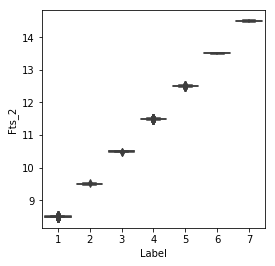

In [12]:
a4_dims = (4, 4)
fig, ax = plt.subplots(1, 1, figsize=a4_dims)
sns.boxplot(x="Label", y="Fts_2", data=df_train, ax=ax)

* From the boxplot, we can find each region are defined in city level, and then record the data in town level. The mean of each region is around 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5
* Ref: https://en.wikipedia.org/wiki/Decimal_degrees
* The difference is quite regular, the datasets might be from satellite for remote sensing

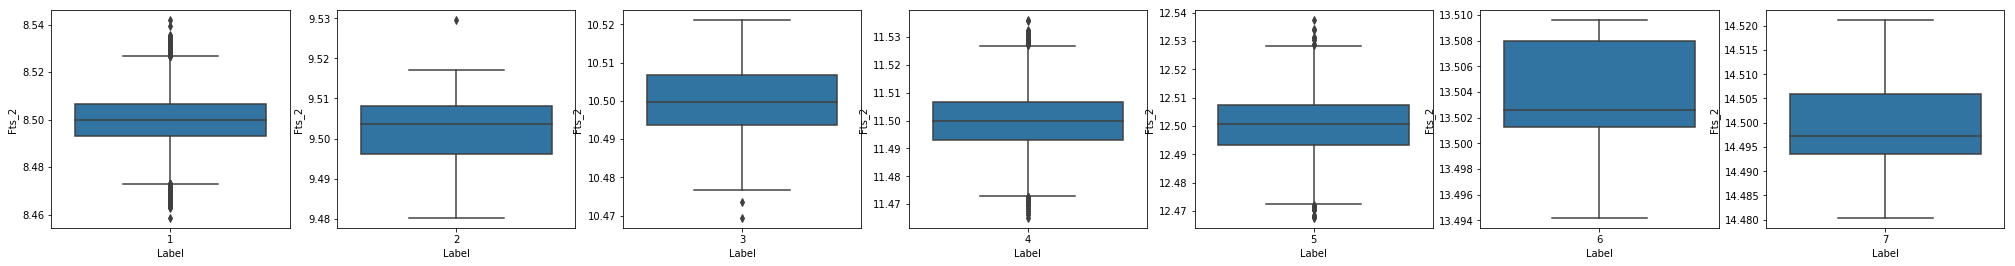

In [13]:
a4_dims = (35, 4)
fig, ax = plt.subplots(1, 7, figsize=a4_dims)
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 1], ax=ax[0])
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 2], ax=ax[1])
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 3], ax=ax[2])
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 4], ax=ax[3])
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 5], ax=ax[4])
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 6], ax=ax[5])
sns.boxplot(x="Label", y="Fts_2", data=df_train[df_train["Label"] == 7], ax=ax[6])

## Feature 7
* The value distribution of this feature shows some rules. It might be the specificication of a device, and it could also mean the data source. If it is a satellite, it might be the resolution of the sensors. (e.g. xxx Satellite Sensor (0.46m)) 
* Ref: https://www.satimagingcorp.com/satellite-sensors/other-satellite-sensors/
* It looks like that each label follows specific proportion. It might be the number to extract data from different sensor sources.

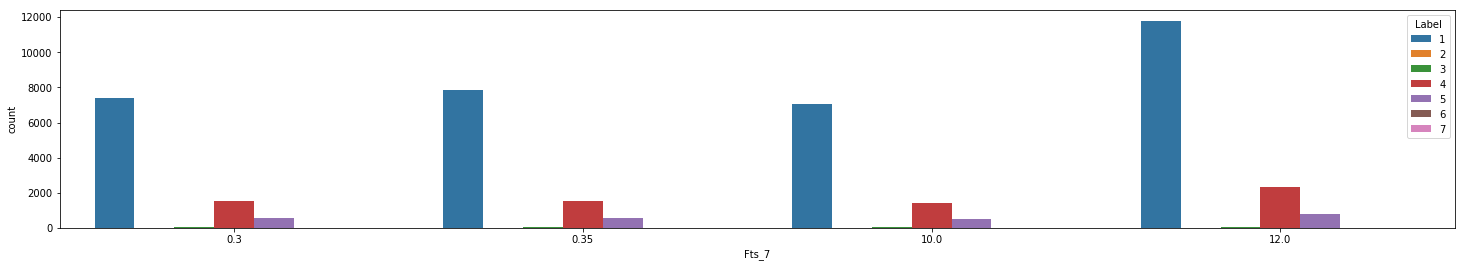

In [14]:
a4_dims = (25, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x=df_train["Fts_7"], hue =df_train["Label"], ax=ax)

In [15]:
df_train["Fts_7"].value_counts()

12.00    15000
0.35     10000
0.30      9500
10.00     9000
Name: Fts_7, dtype: int64

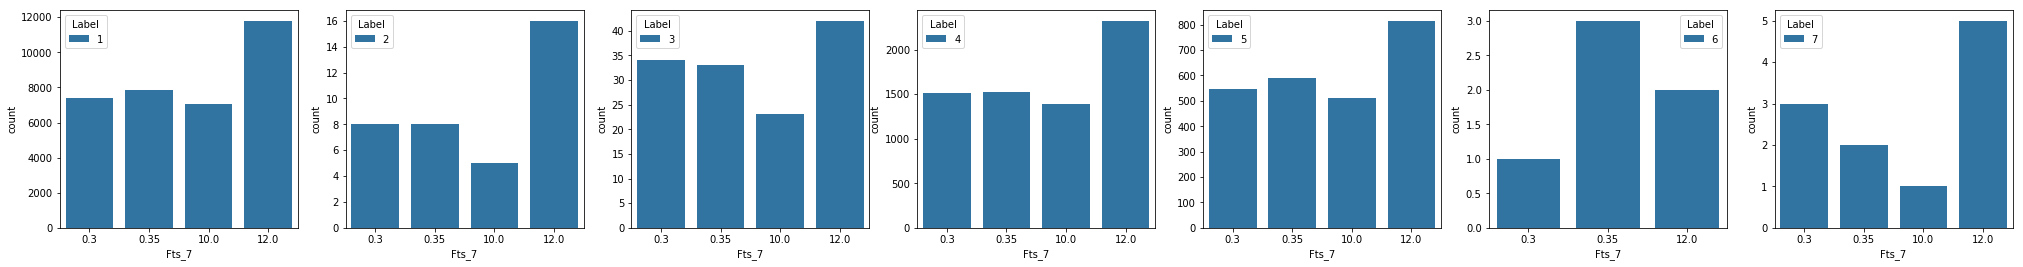

In [16]:
a4_dims = (35, 4)
fig, ax = plt.subplots(1, 7, figsize=a4_dims)
sns.countplot(x=df_train[df_train["Label"] == 1]["Fts_7"], hue=df_train[df_train["Label"] == 1]["Label"], ax=ax[0])
sns.countplot(x=df_train[df_train["Label"] == 2]["Fts_7"], hue=df_train[df_train["Label"] == 2]["Label"], ax=ax[1])
sns.countplot(x=df_train[df_train["Label"] == 3]["Fts_7"], hue=df_train[df_train["Label"] == 3]["Label"], ax=ax[2])
sns.countplot(x=df_train[df_train["Label"] == 4]["Fts_7"], hue=df_train[df_train["Label"] == 4]["Label"], ax=ax[3])
sns.countplot(x=df_train[df_train["Label"] == 5]["Fts_7"], hue=df_train[df_train["Label"] == 5]["Label"], ax=ax[4])
sns.countplot(x=df_train[df_train["Label"] == 6]["Fts_7"], hue=df_train[df_train["Label"] == 6]["Label"], ax=ax[5])
sns.countplot(x=df_train[df_train["Label"] == 7]["Fts_7"], hue=df_train[df_train["Label"] == 7]["Label"], ax=ax[6])

## Feature 0, 1,3,4,5,6,8,9,10
* These 9 features looks like a series of continuous variables and the measurements are the rounded-off values.
* These histograms might be the electromagnetic spectrum arranged by wavelength.

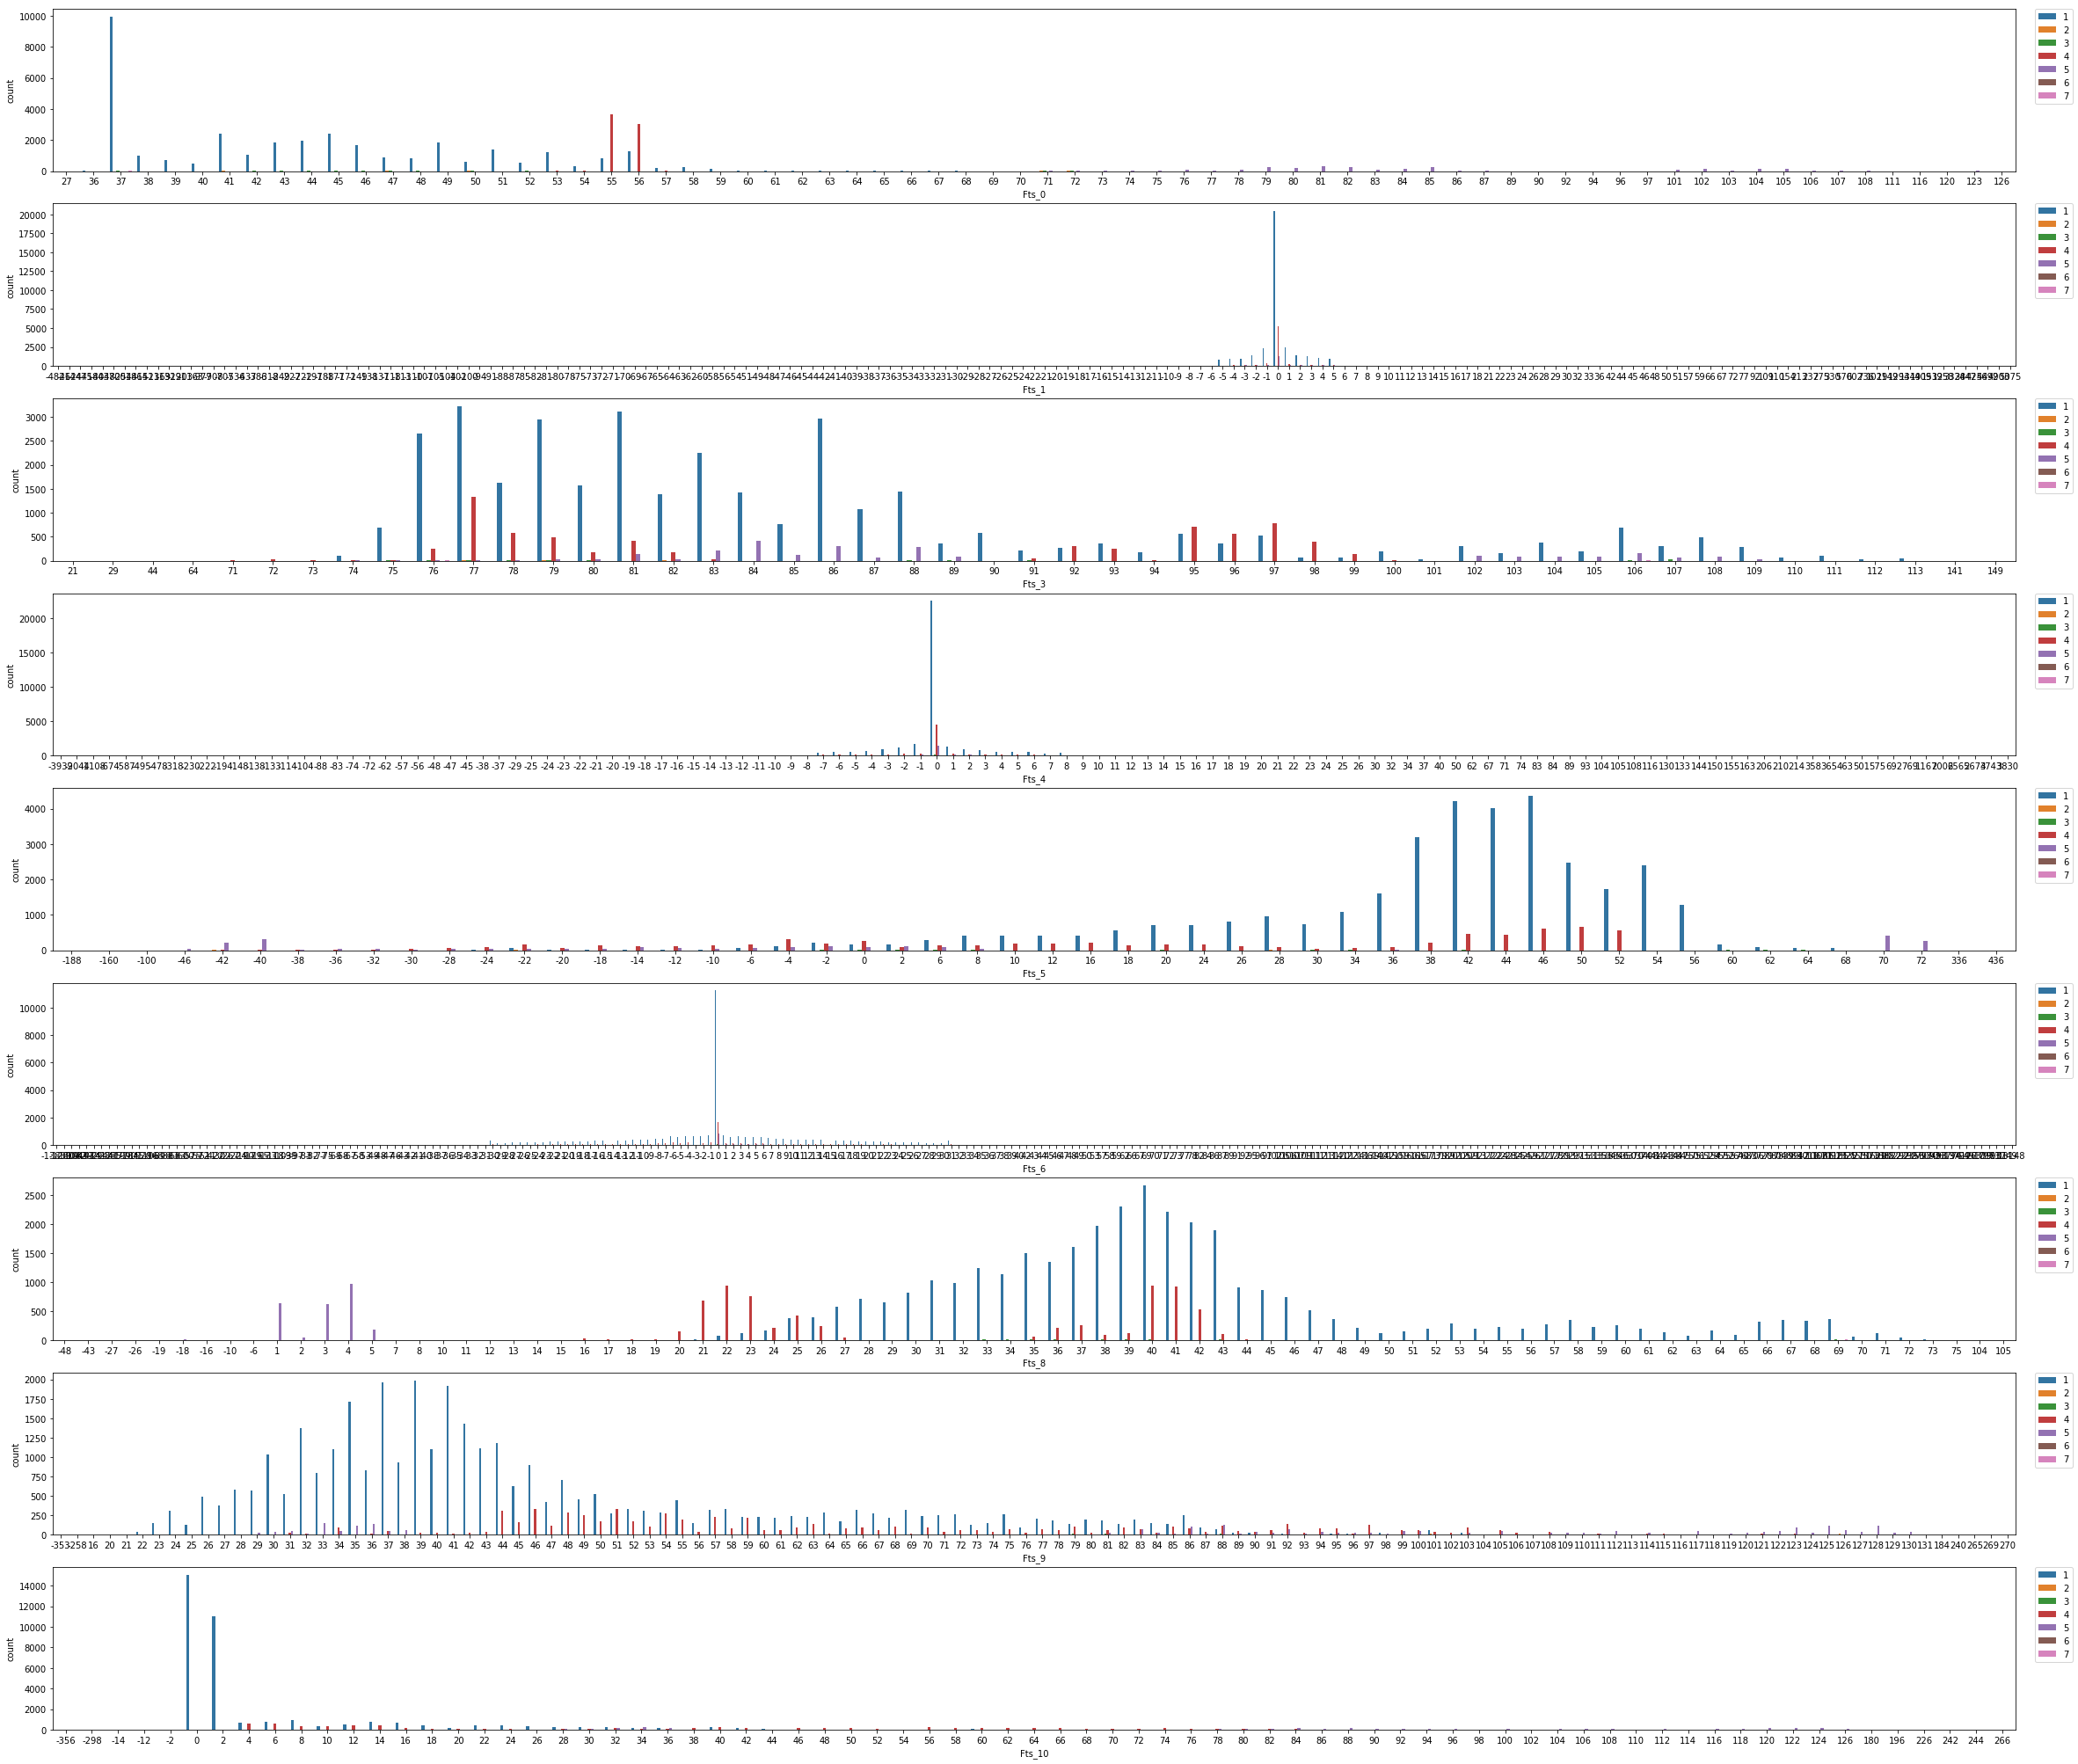

In [17]:
fig, ax = plt.subplots(figsize=(40,36))
plt.subplot(911)
sns.countplot(x=df_train["Fts_0"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(912)
sns.countplot(x=df_train["Fts_1"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(913)
sns.countplot(x=df_train["Fts_3"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(914)
sns.countplot(x=df_train["Fts_4"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(915)
sns.countplot(x=df_train["Fts_5"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(916)
sns.countplot(x=df_train["Fts_6"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(917)
sns.countplot(x=df_train["Fts_8"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(918)
sns.countplot(x=df_train["Fts_9"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.subplot(919)
sns.countplot(x=df_train["Fts_10"], hue =df_train["Label"])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### spectral based on different sensor
* We plot feature 0 and feature 1 over different sensors, and the sensors show almost the same shape of spectra distribution. That means the sensors show the same behavior in their tasks. There might be little different in effective band, but the sensors are compliment each other.

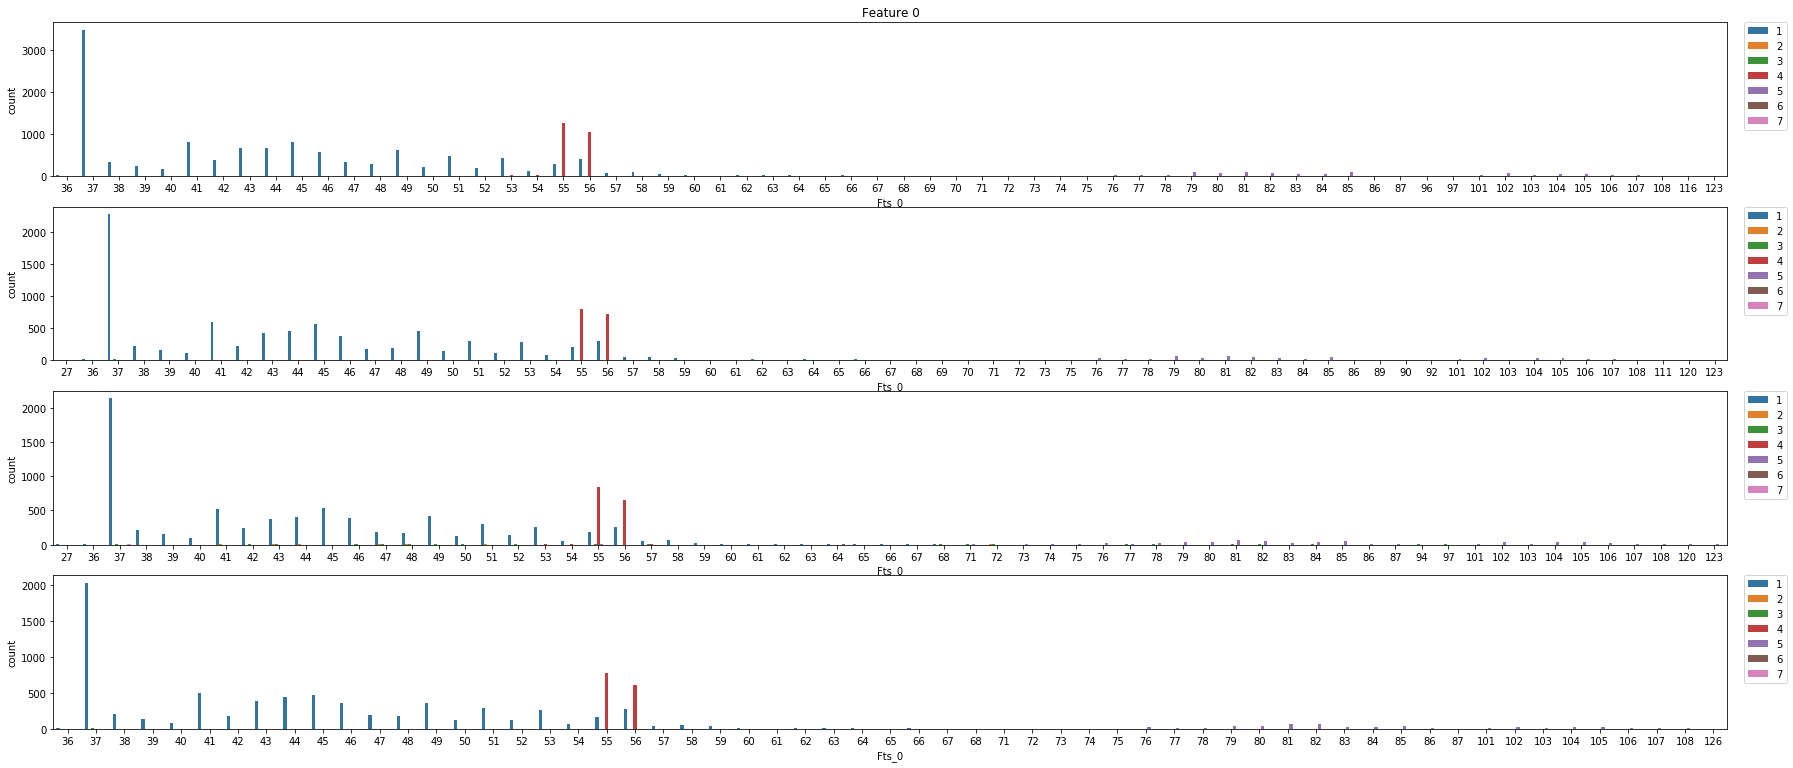

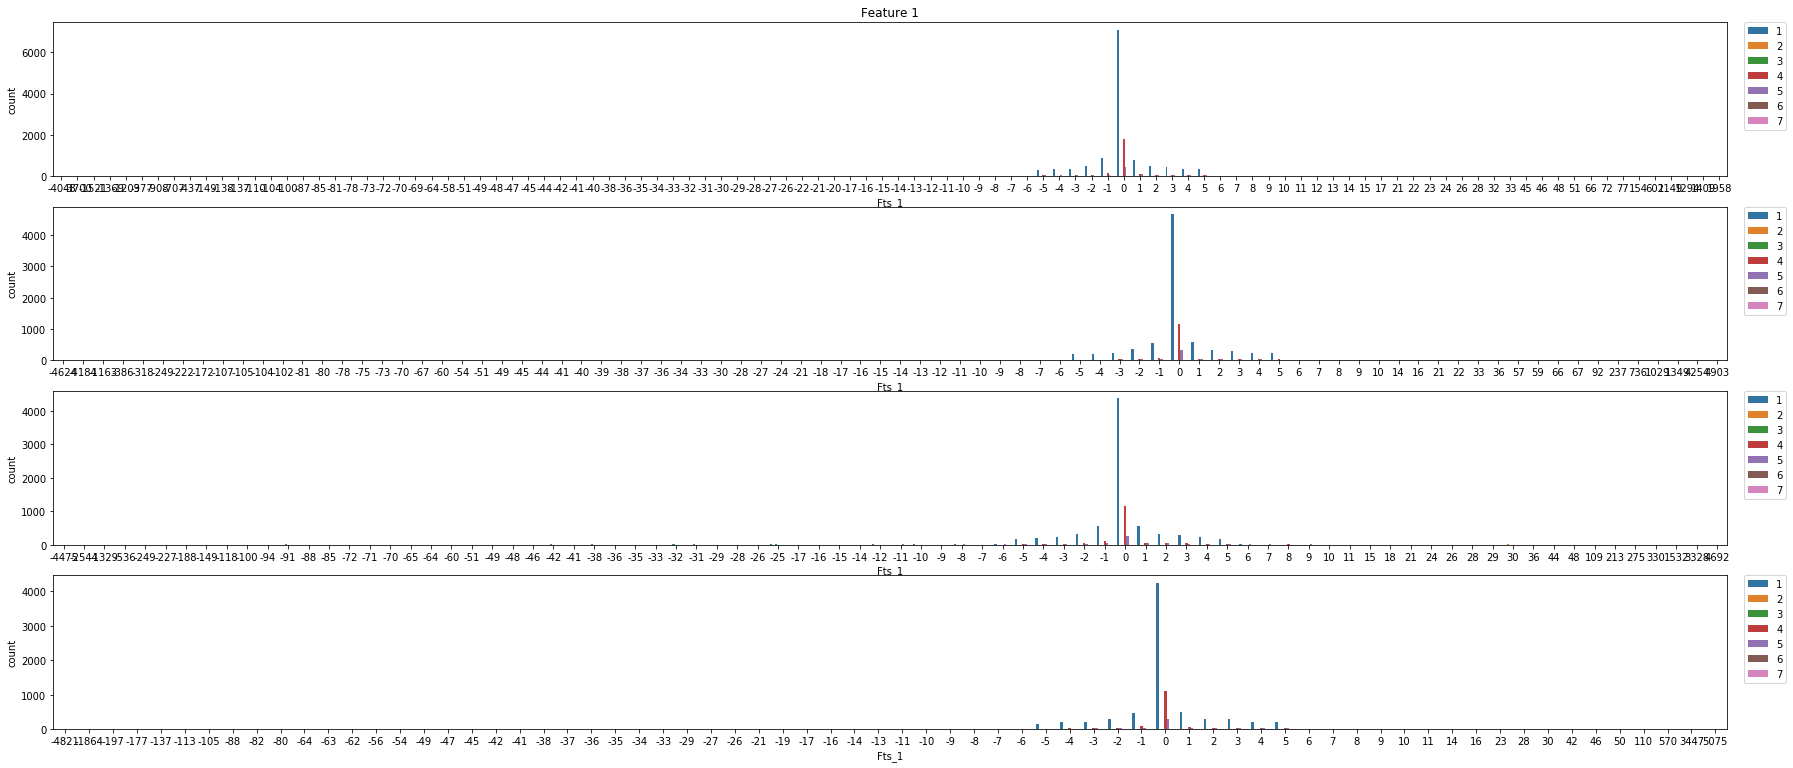

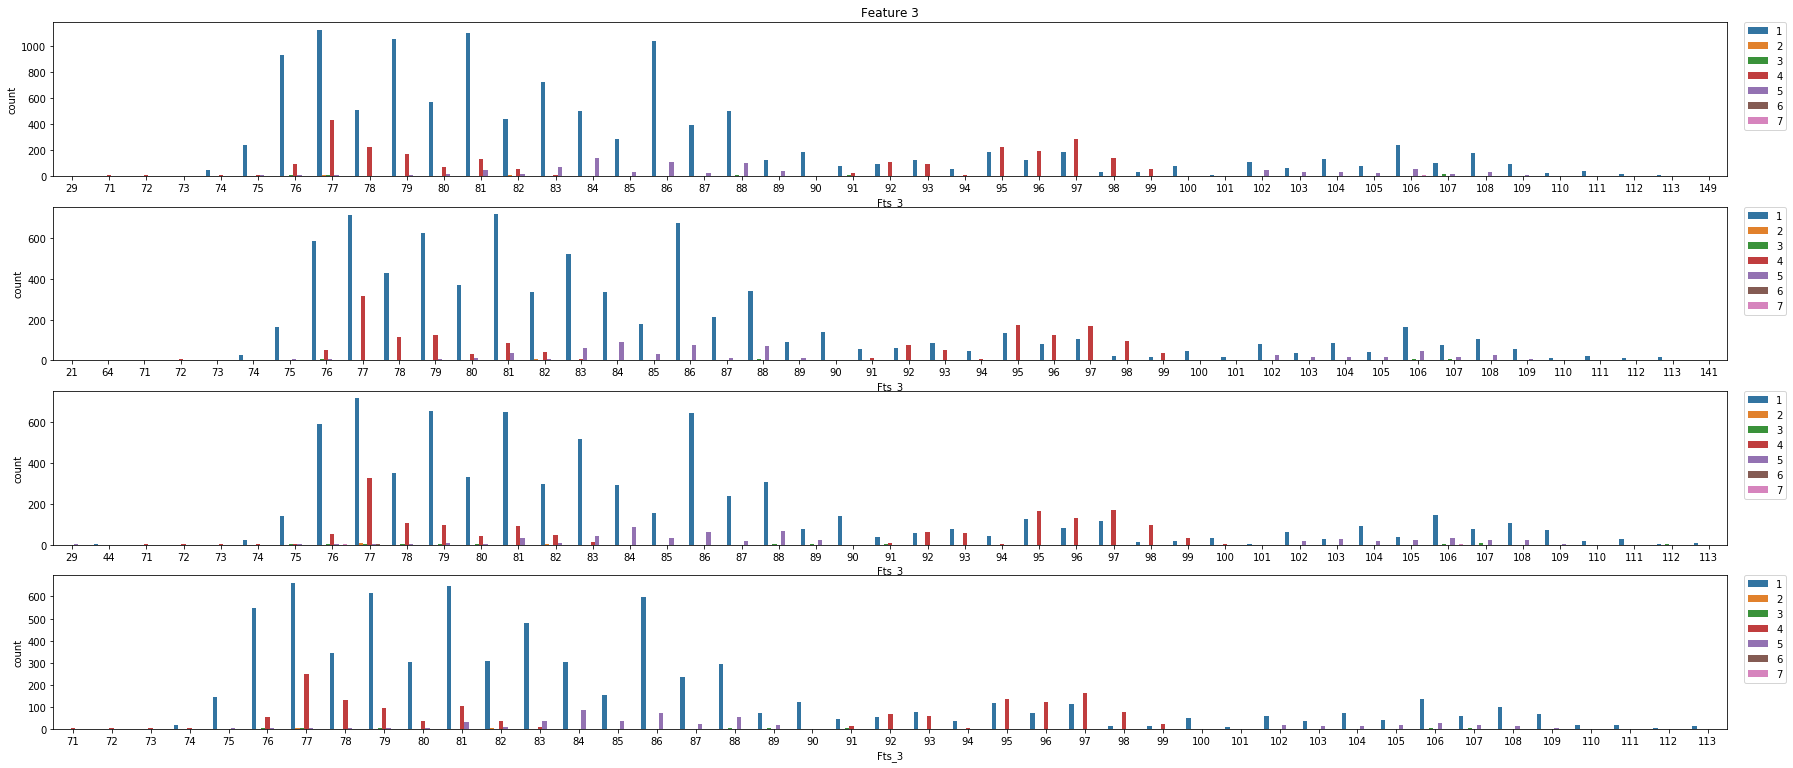

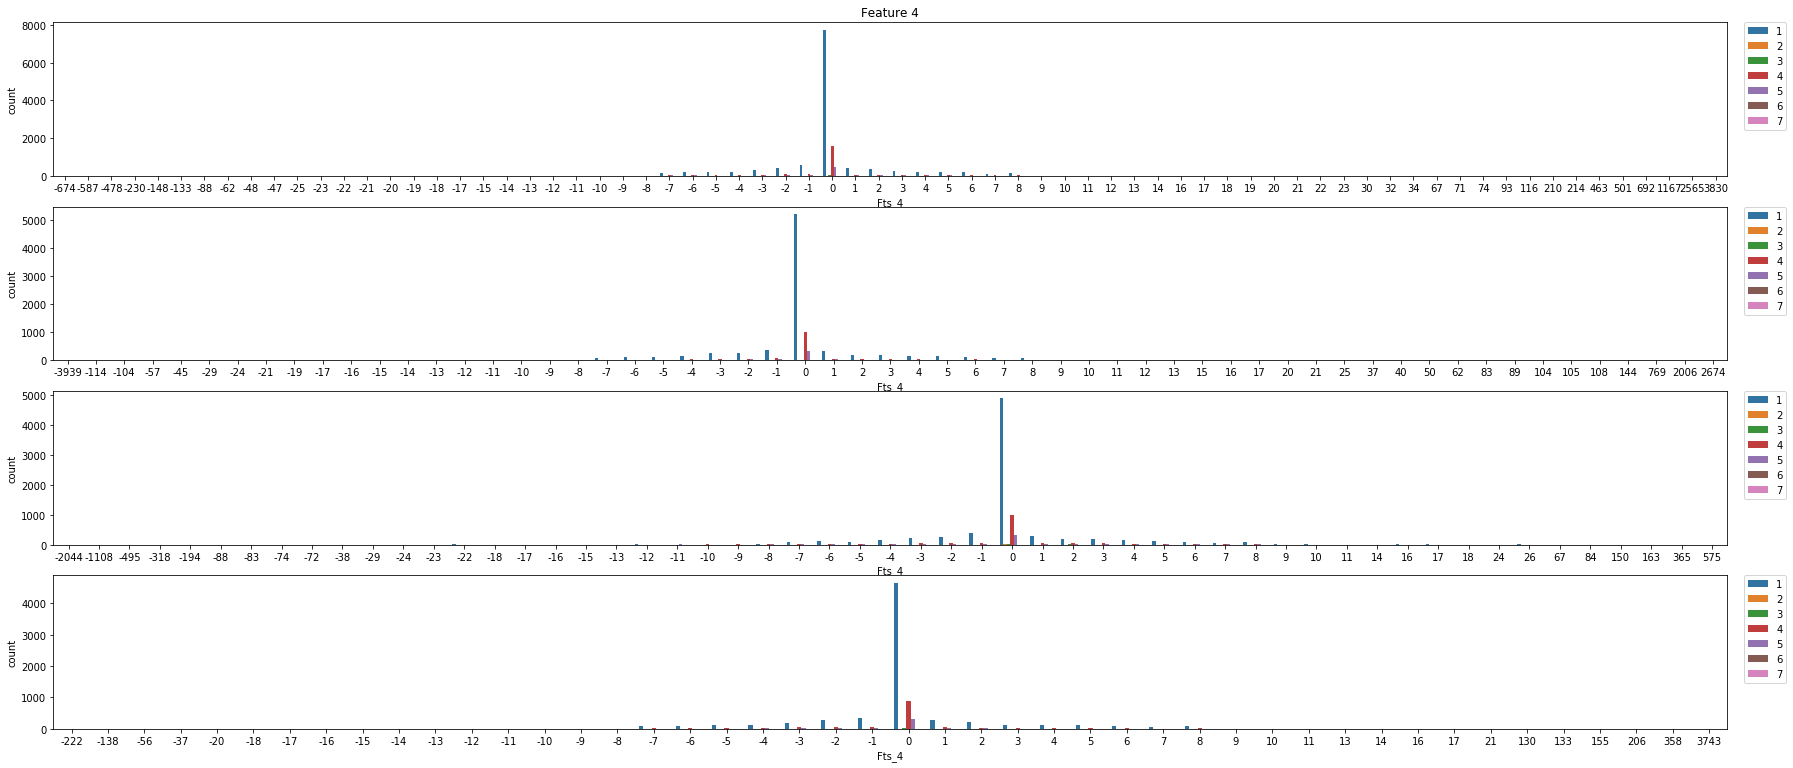

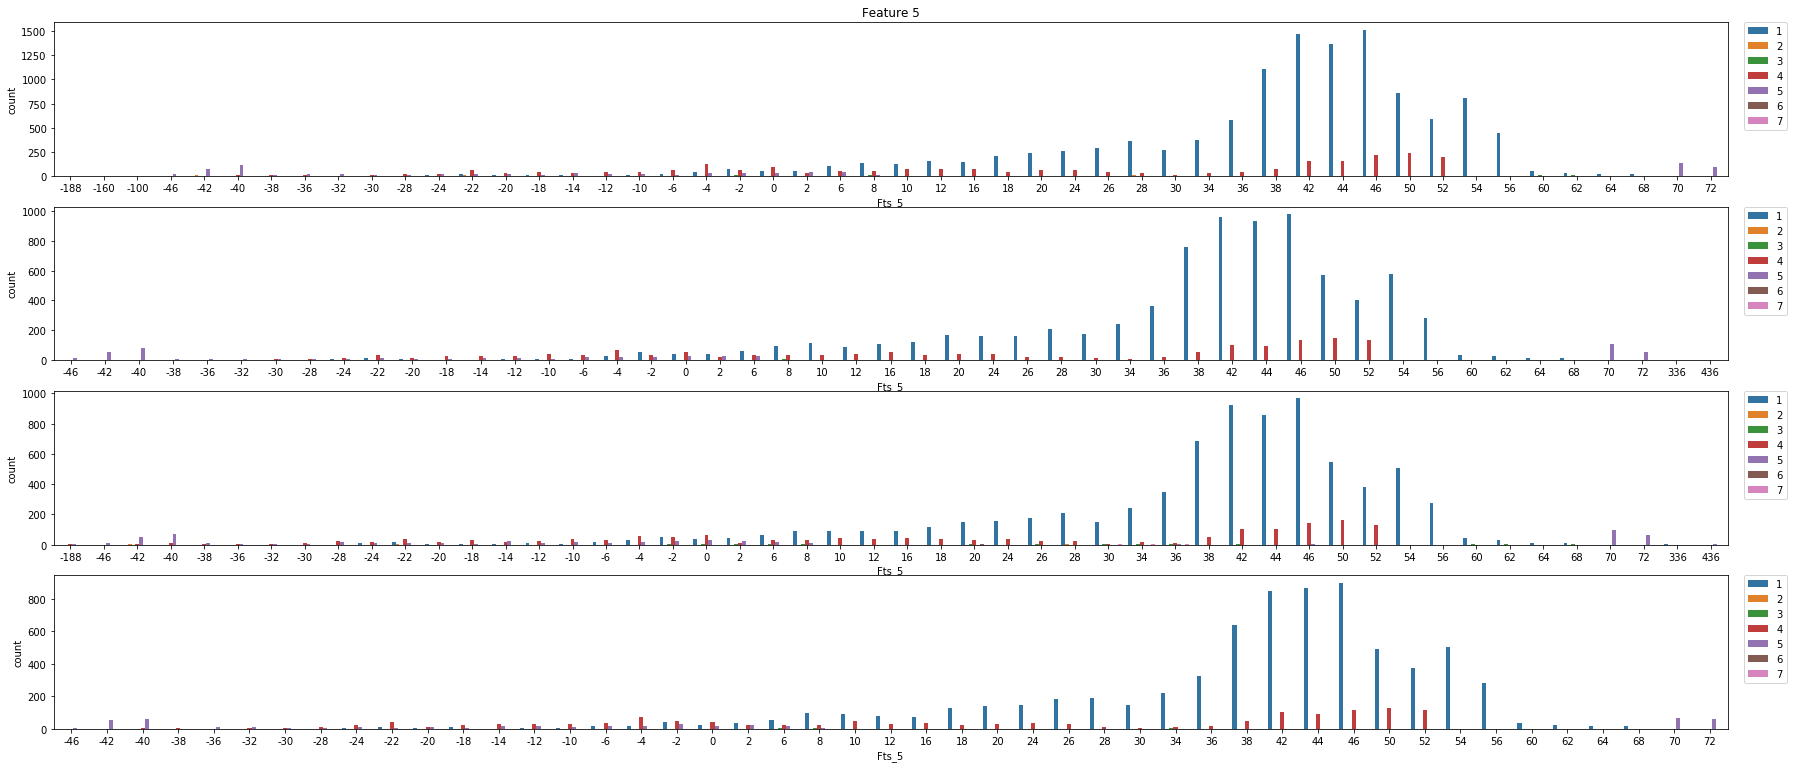

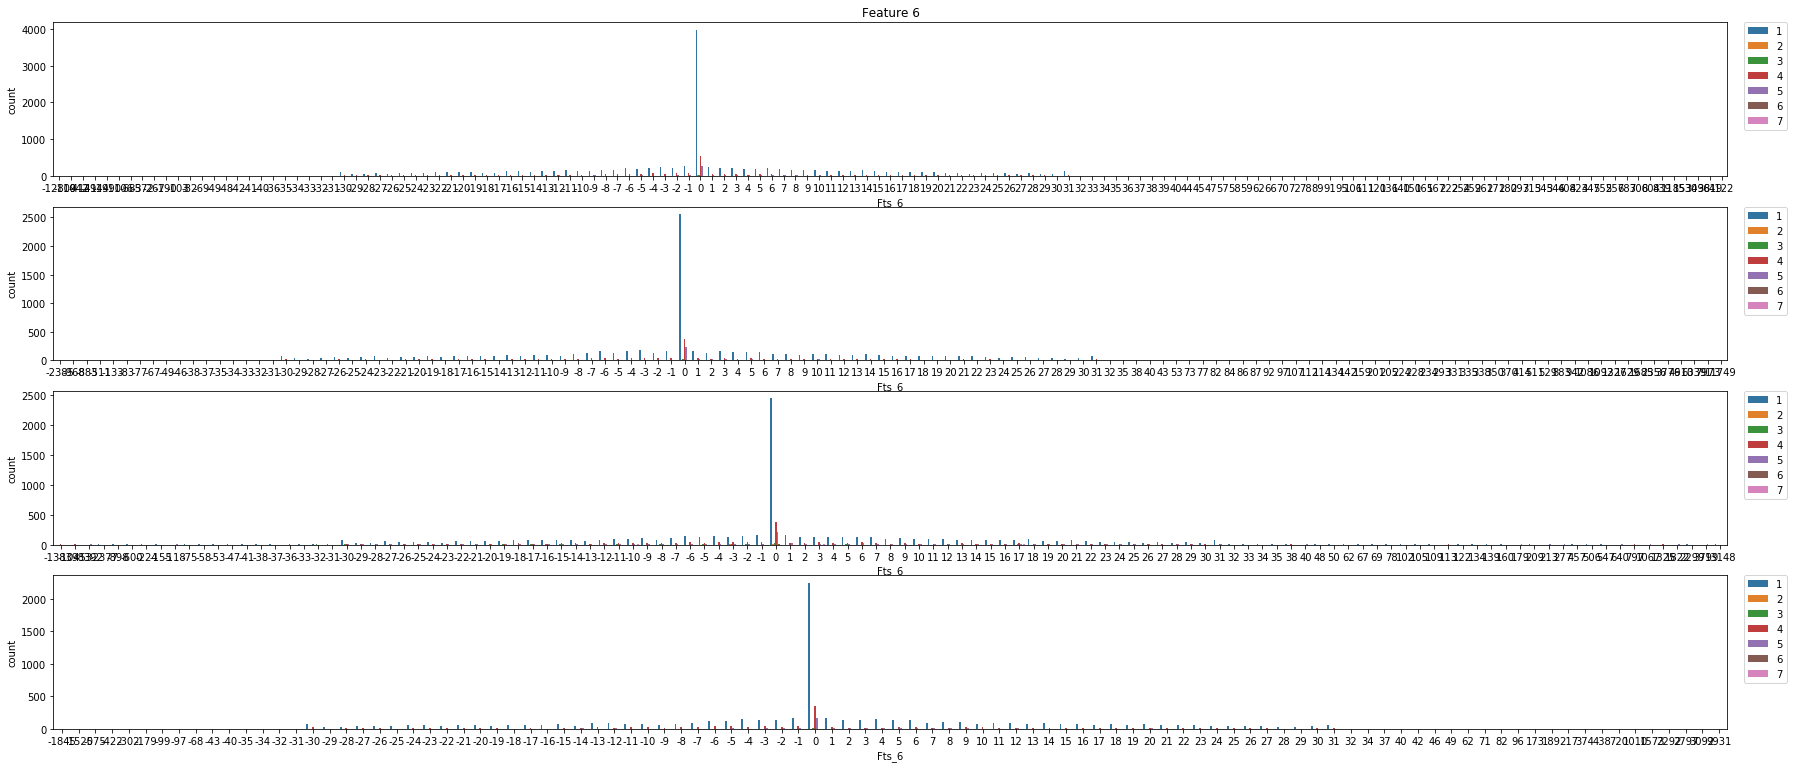

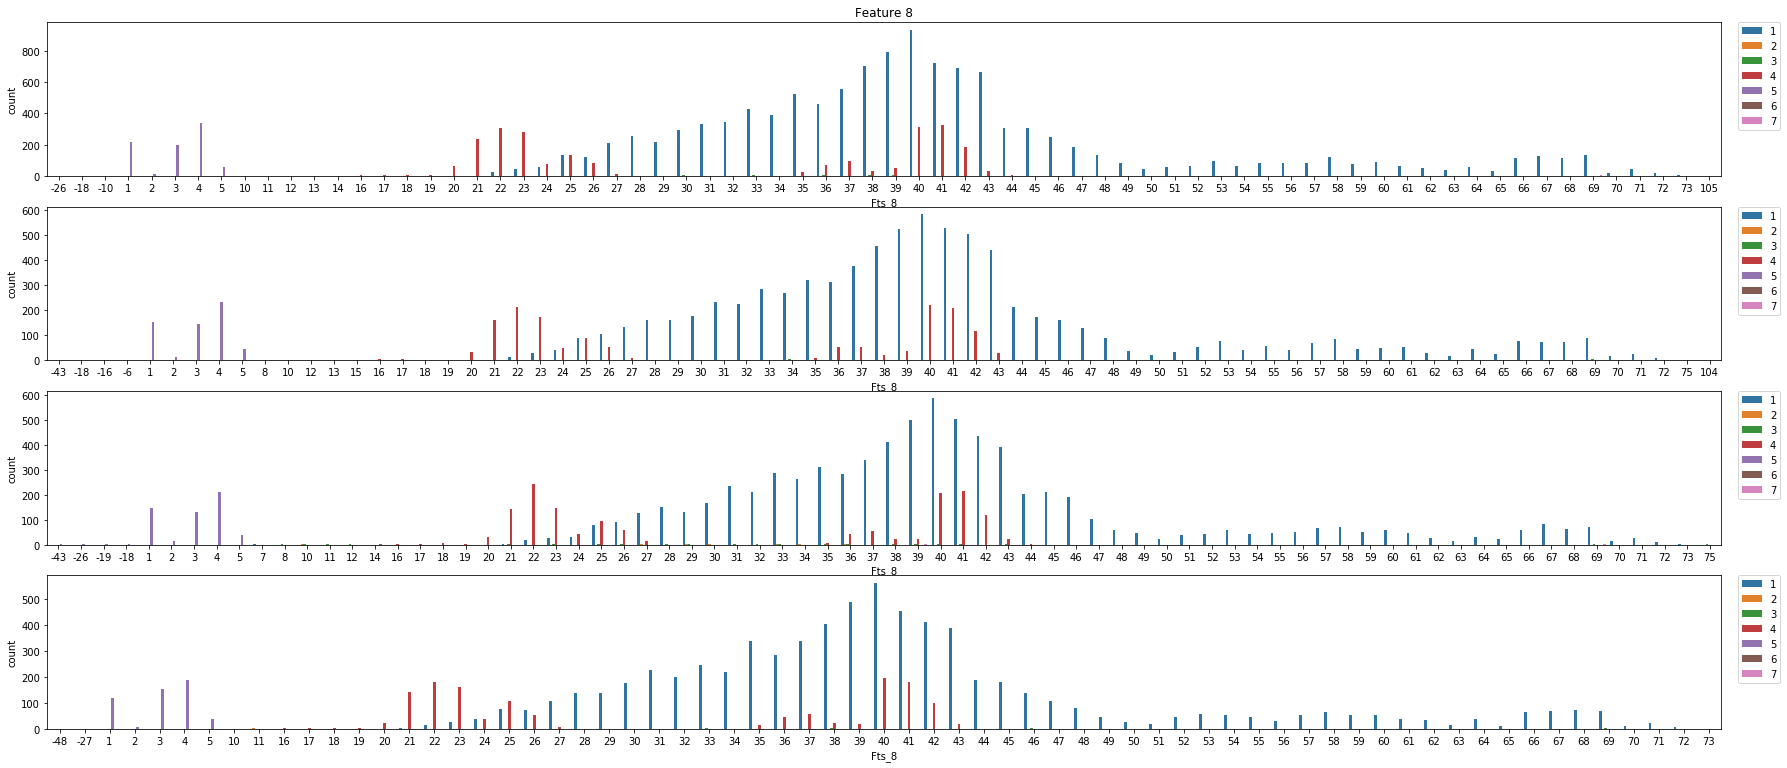

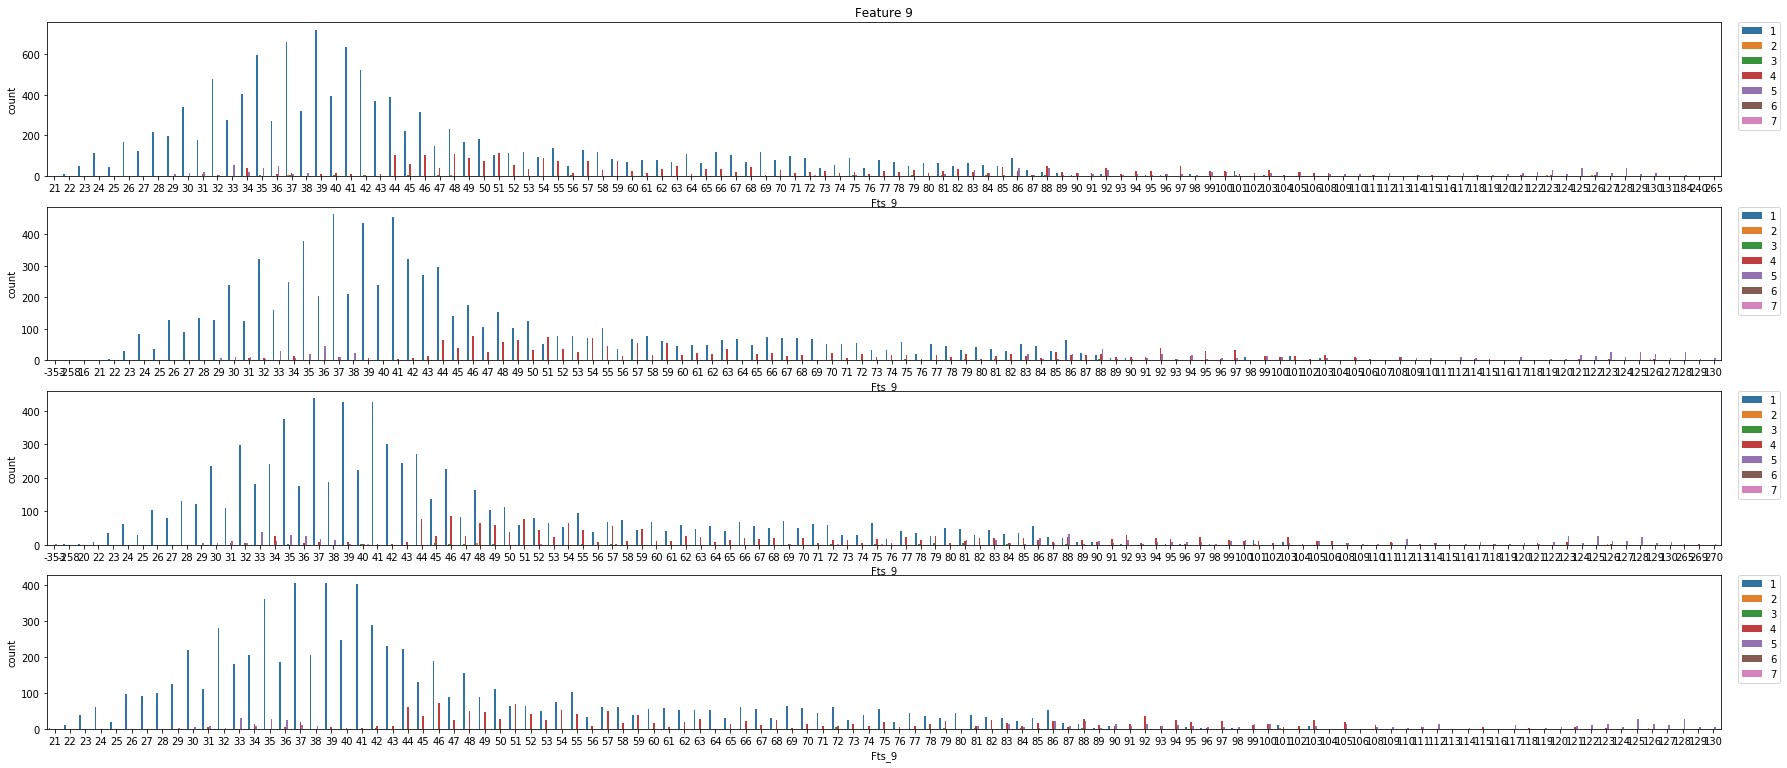

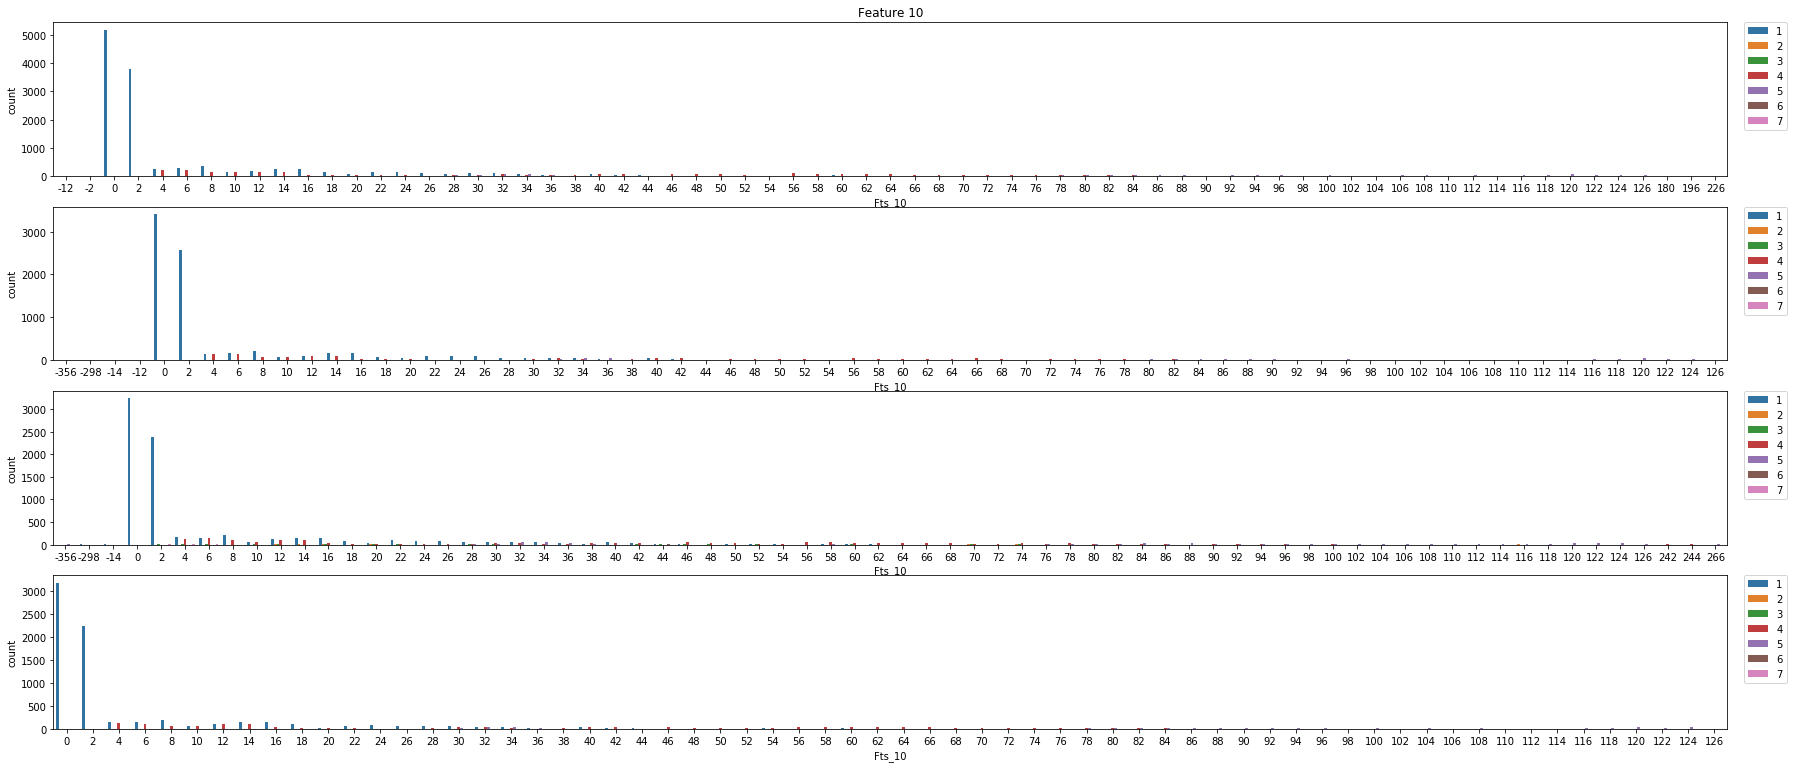

In [18]:
for i in ["0", "1","3","4","5","6","8","9","10"]:
    fig, ax = plt.subplots(figsize=(30,13))
    plt.subplot(411)
    plt.title("Feature {}".format(i))
    sns.countplot(x=df_train[df_train["Fts_7"] == 12.00]["Fts_" + i], hue=df_train["Label"])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

    plt.subplot(412)
    sns.countplot(x=df_train[df_train["Fts_7"] == 0.35]["Fts_" + i], hue=df_train["Label"])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

    plt.subplot(413)
    sns.countplot(x=df_train[df_train["Fts_7"] == 0.30]["Fts_" + i], hue=df_train["Label"])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

    plt.subplot(414)
    sns.countplot(x=df_train[df_train["Fts_7"] == 10.00]["Fts_" + i], hue=df_train["Label"])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### spectral based on different regions
* different region shows different spectral, so these features can also used as predictors.

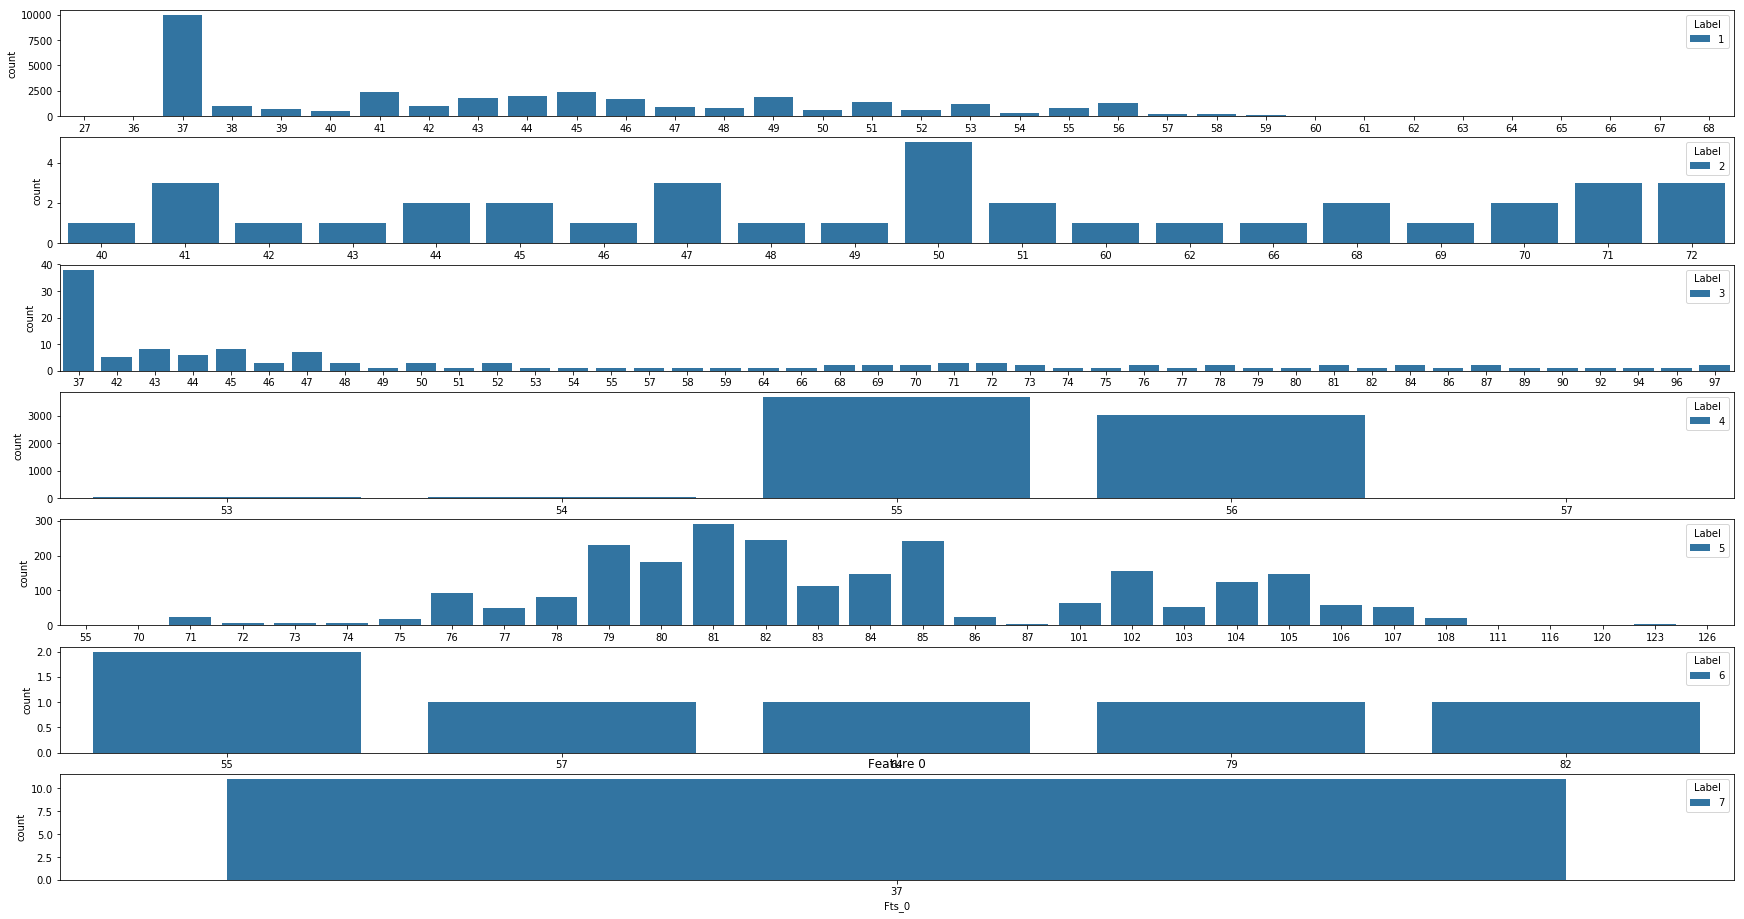

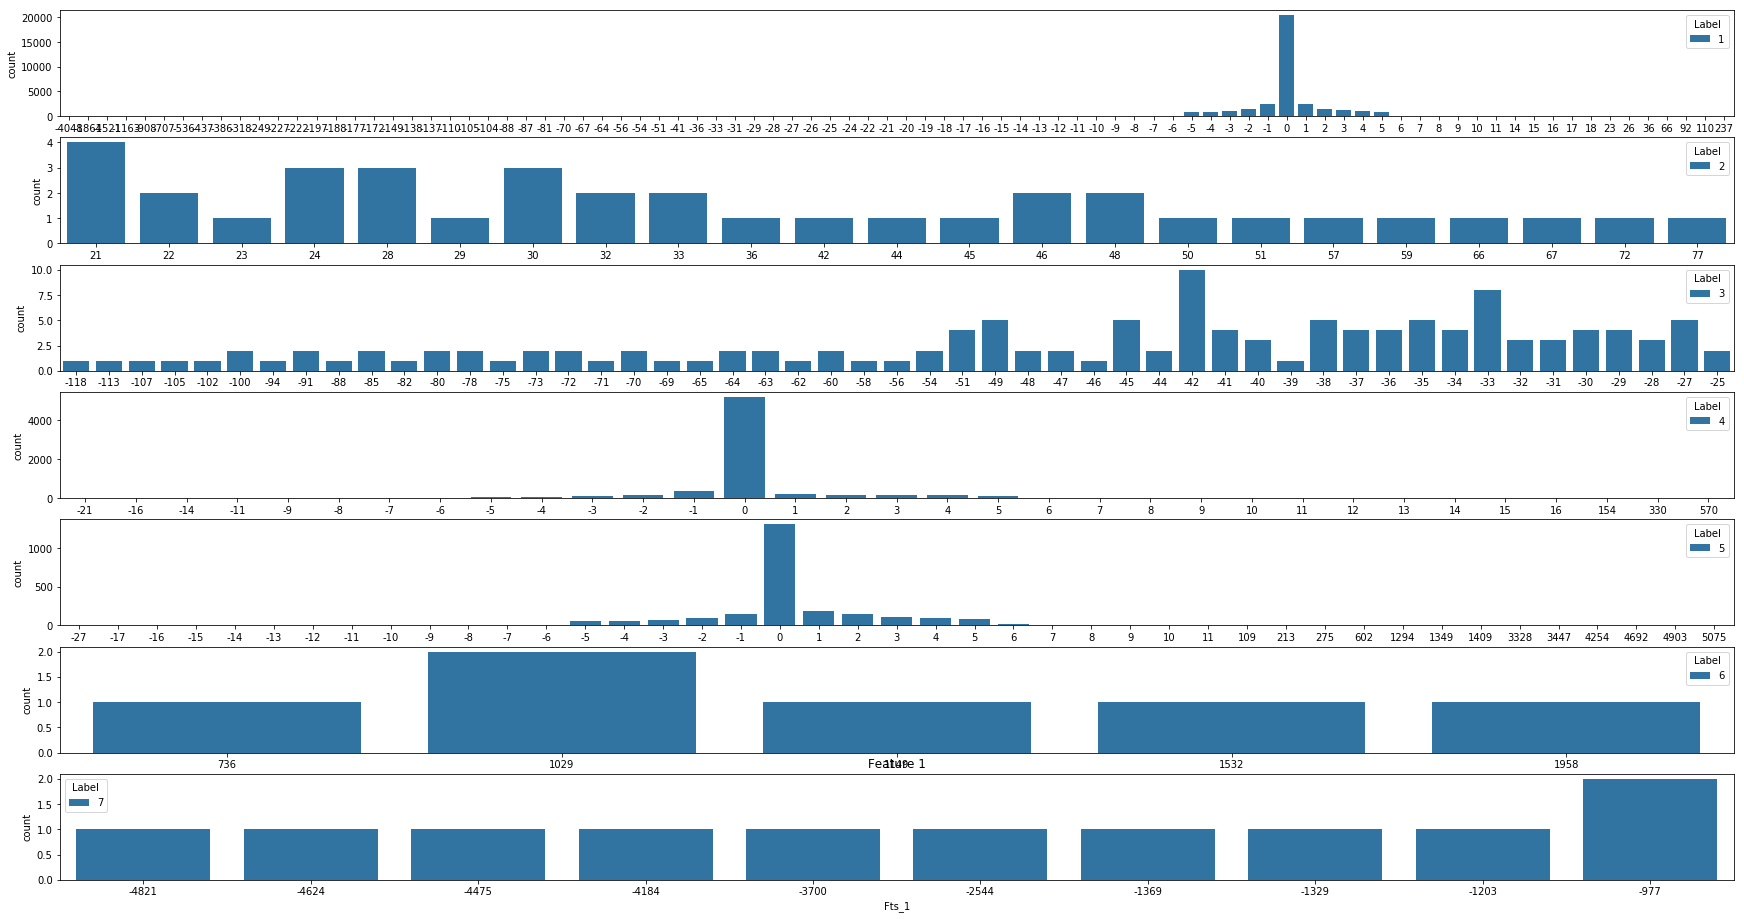

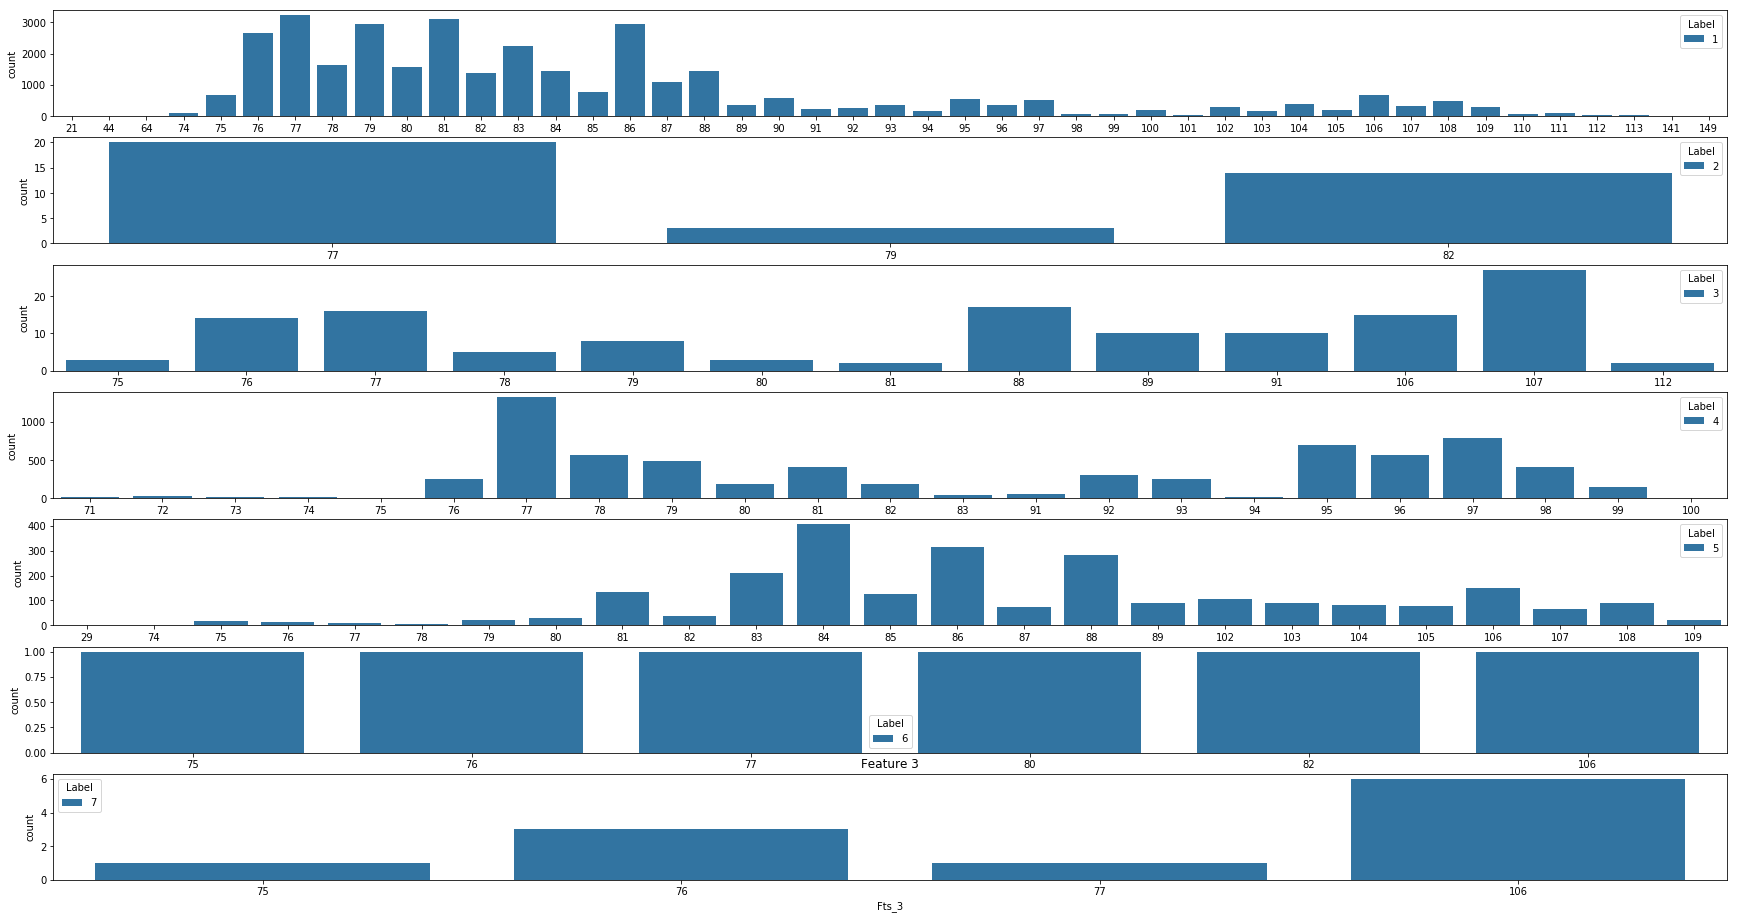

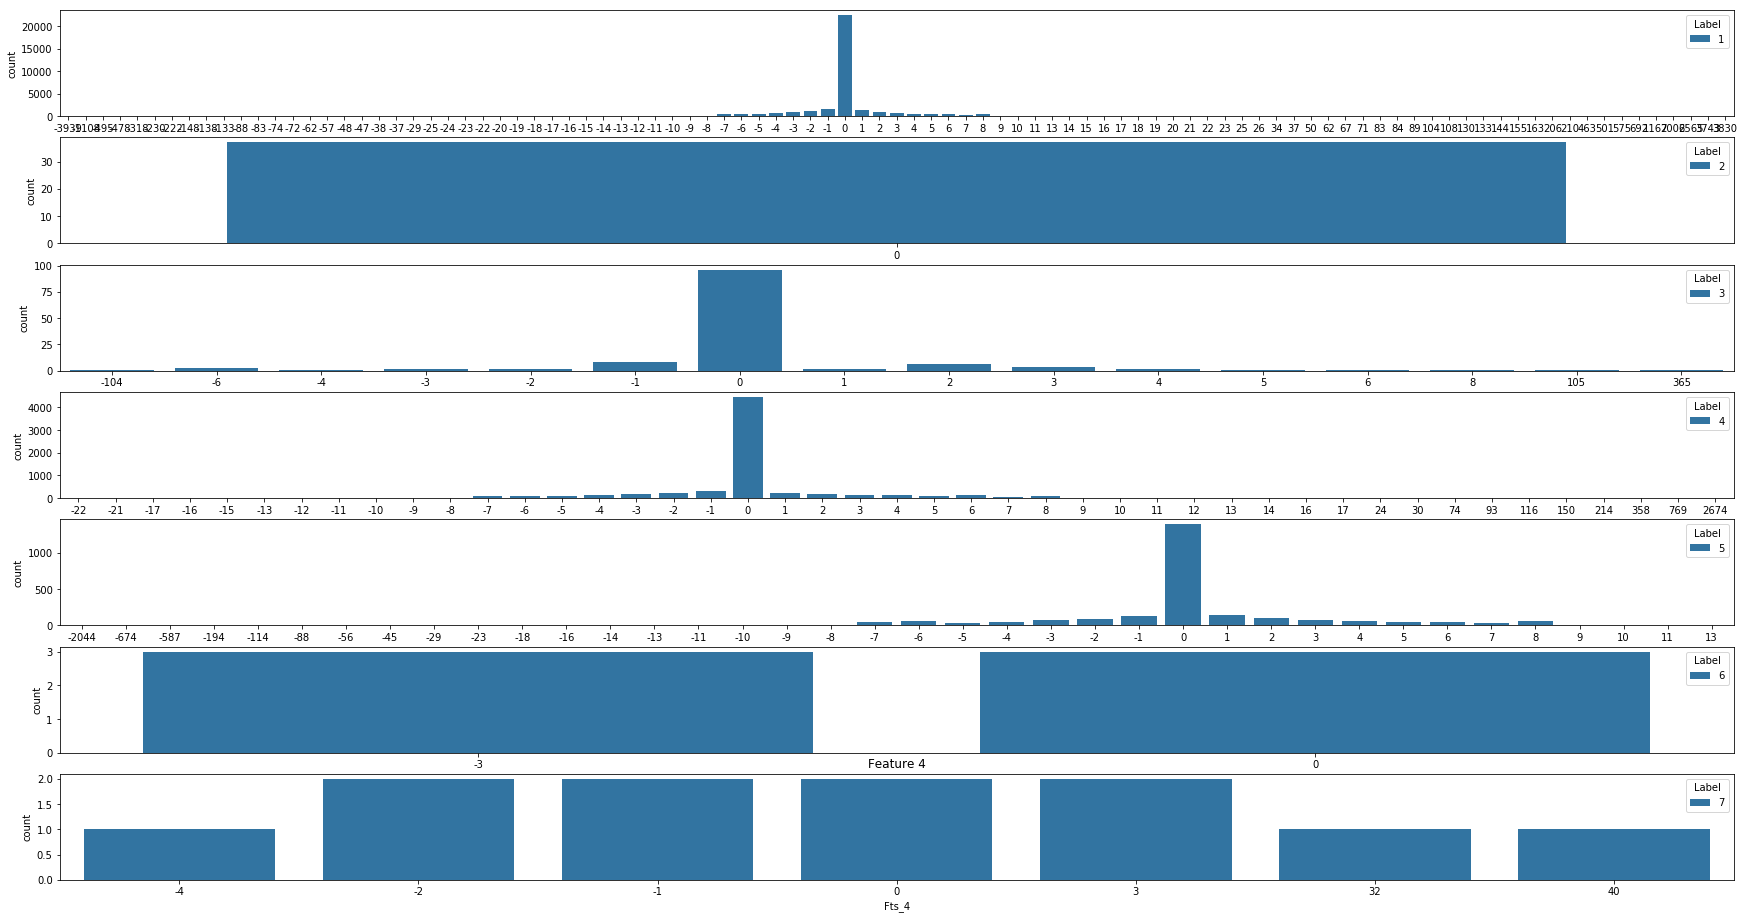

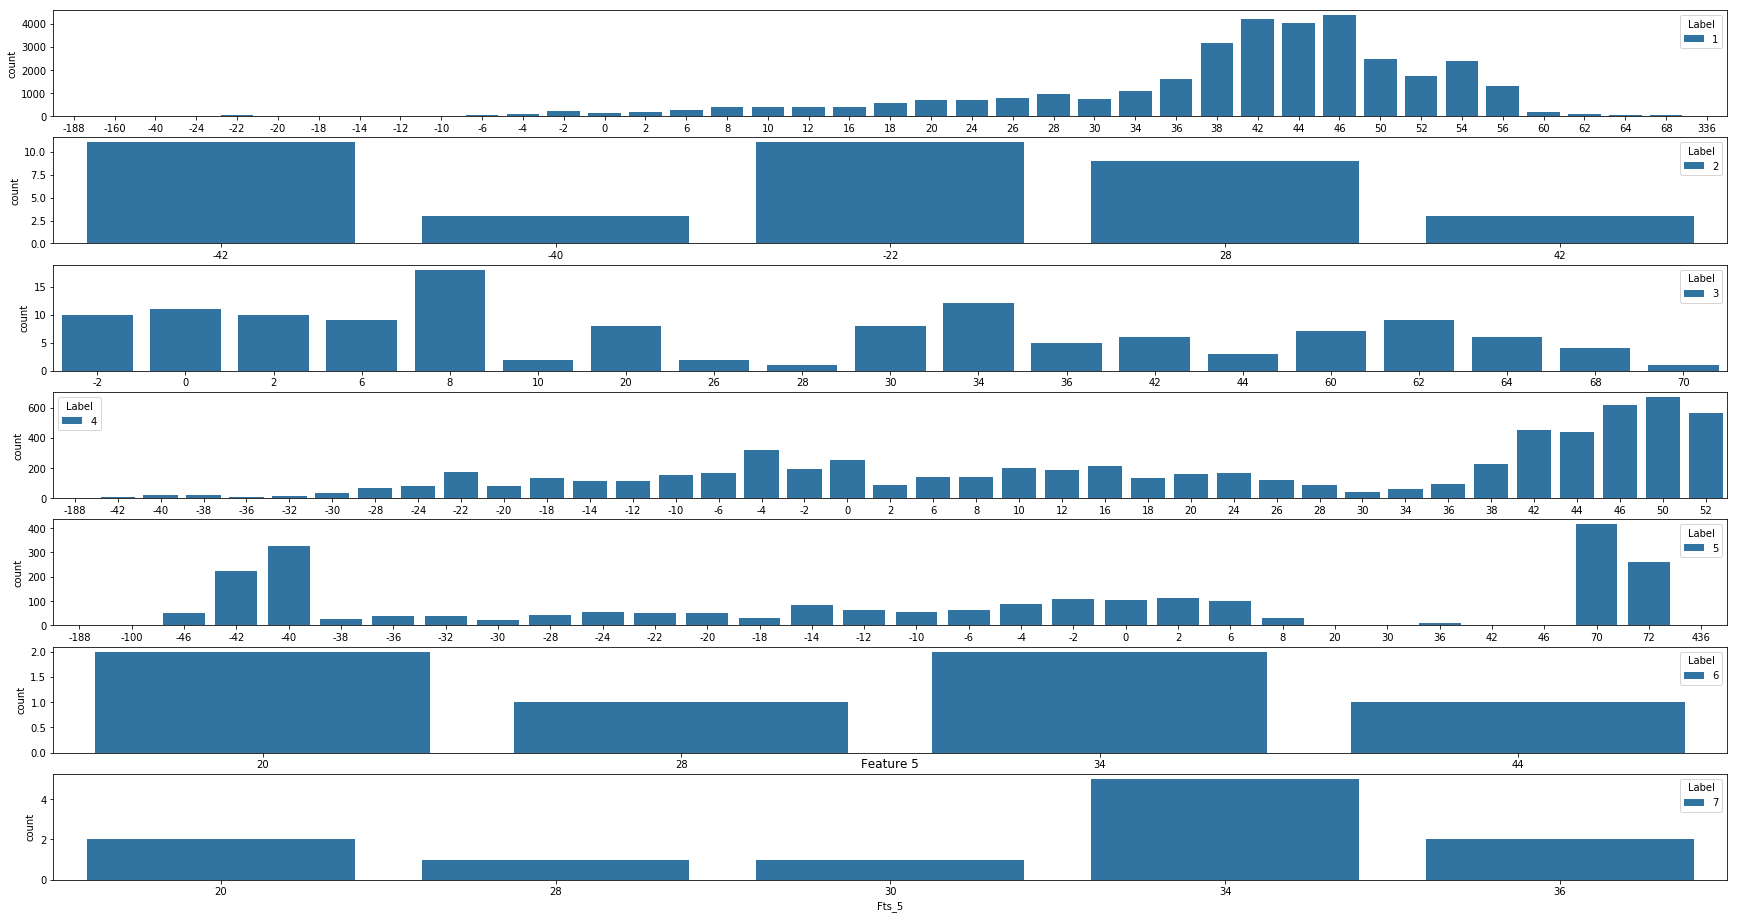

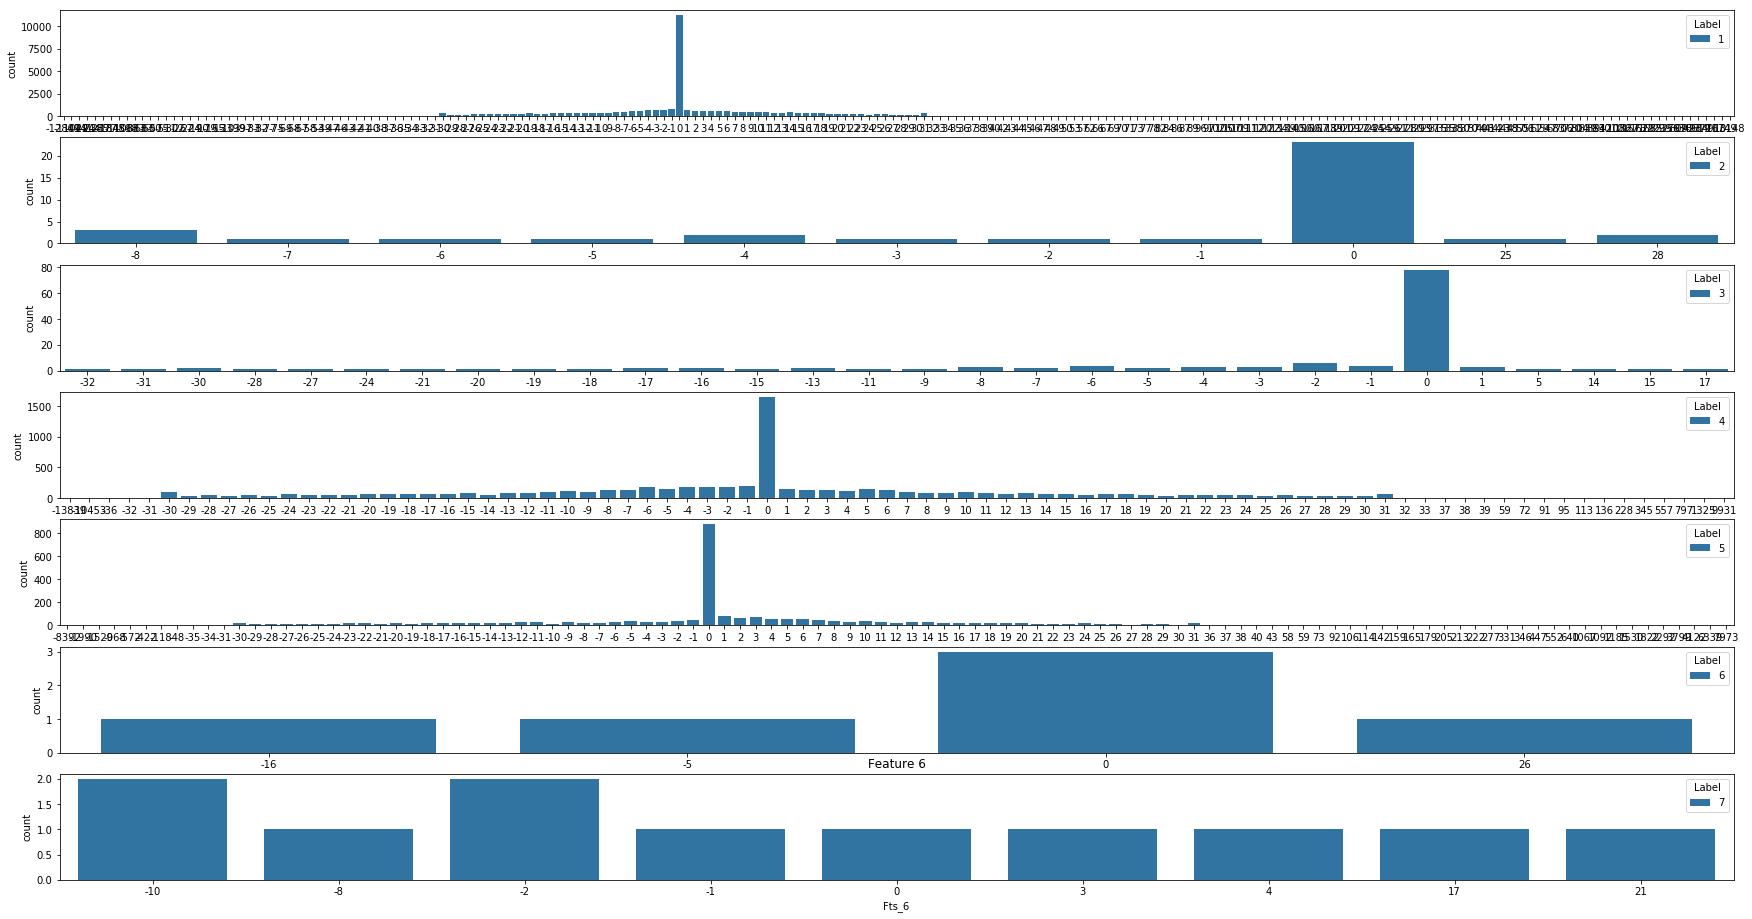

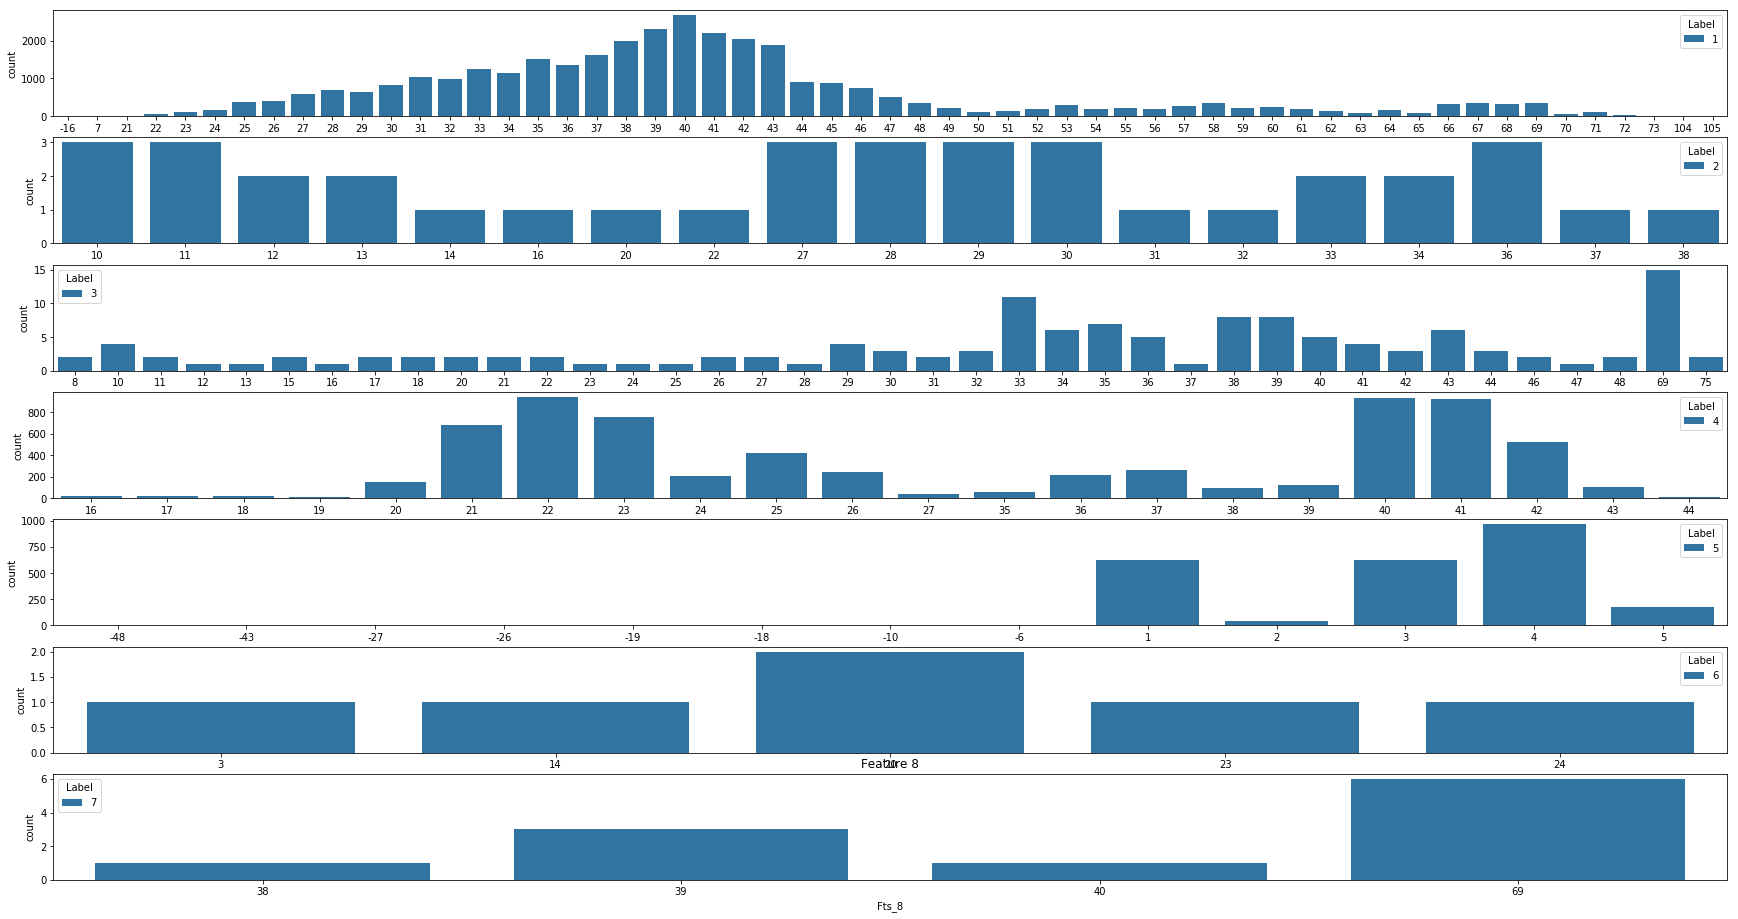

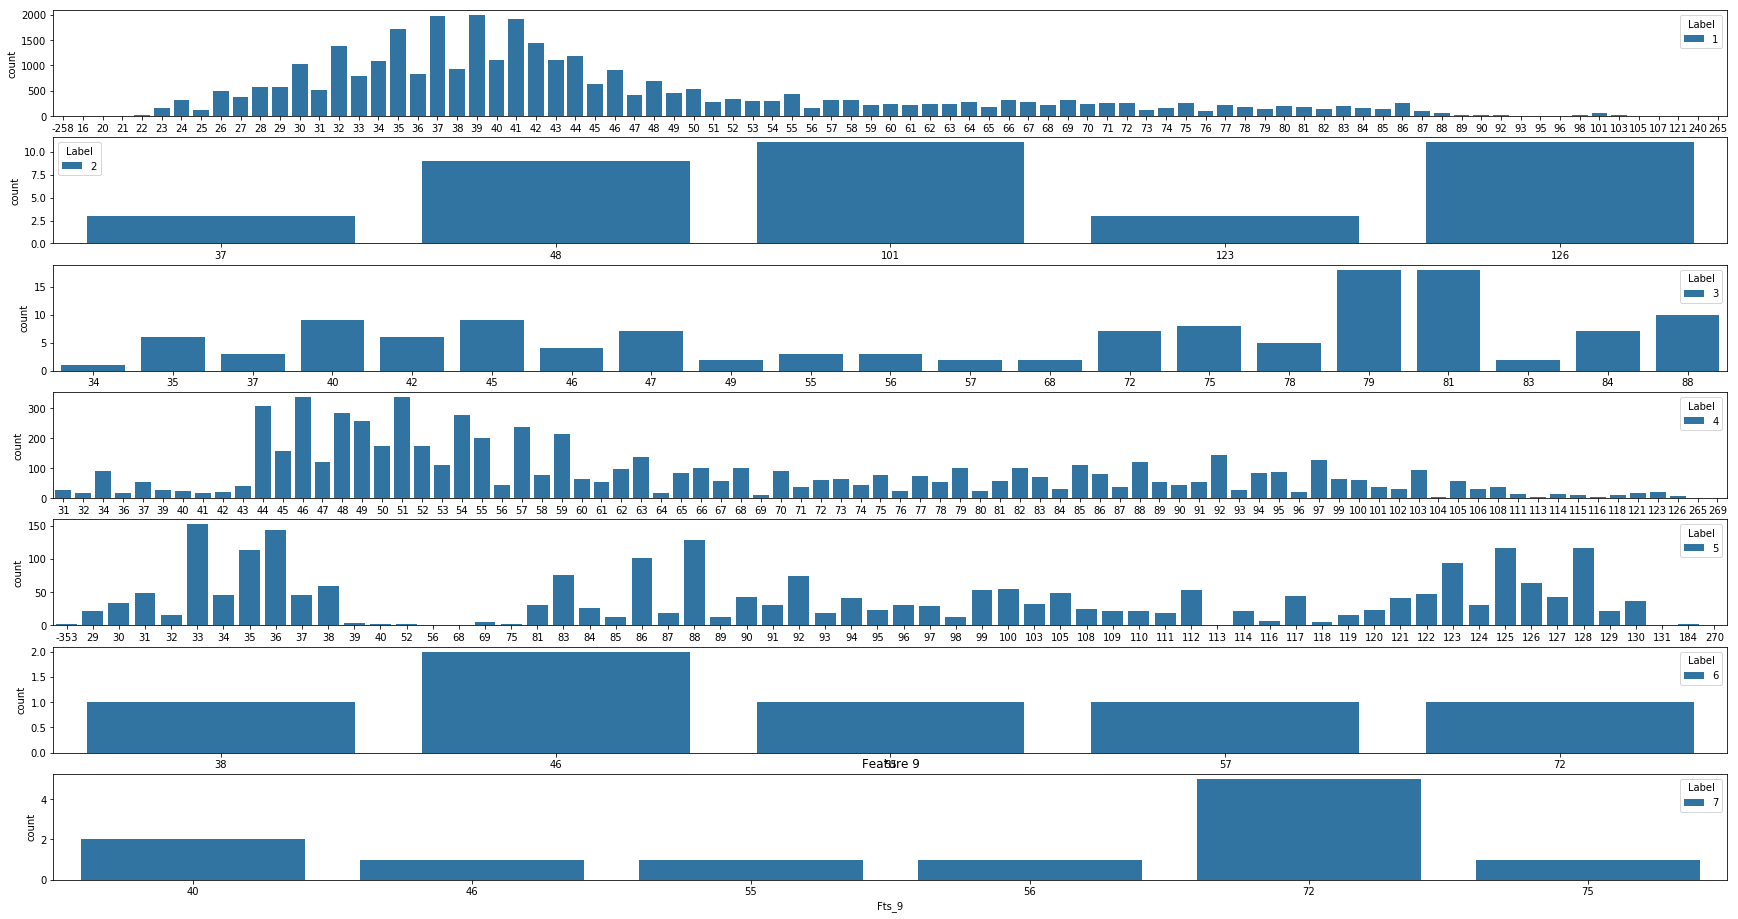

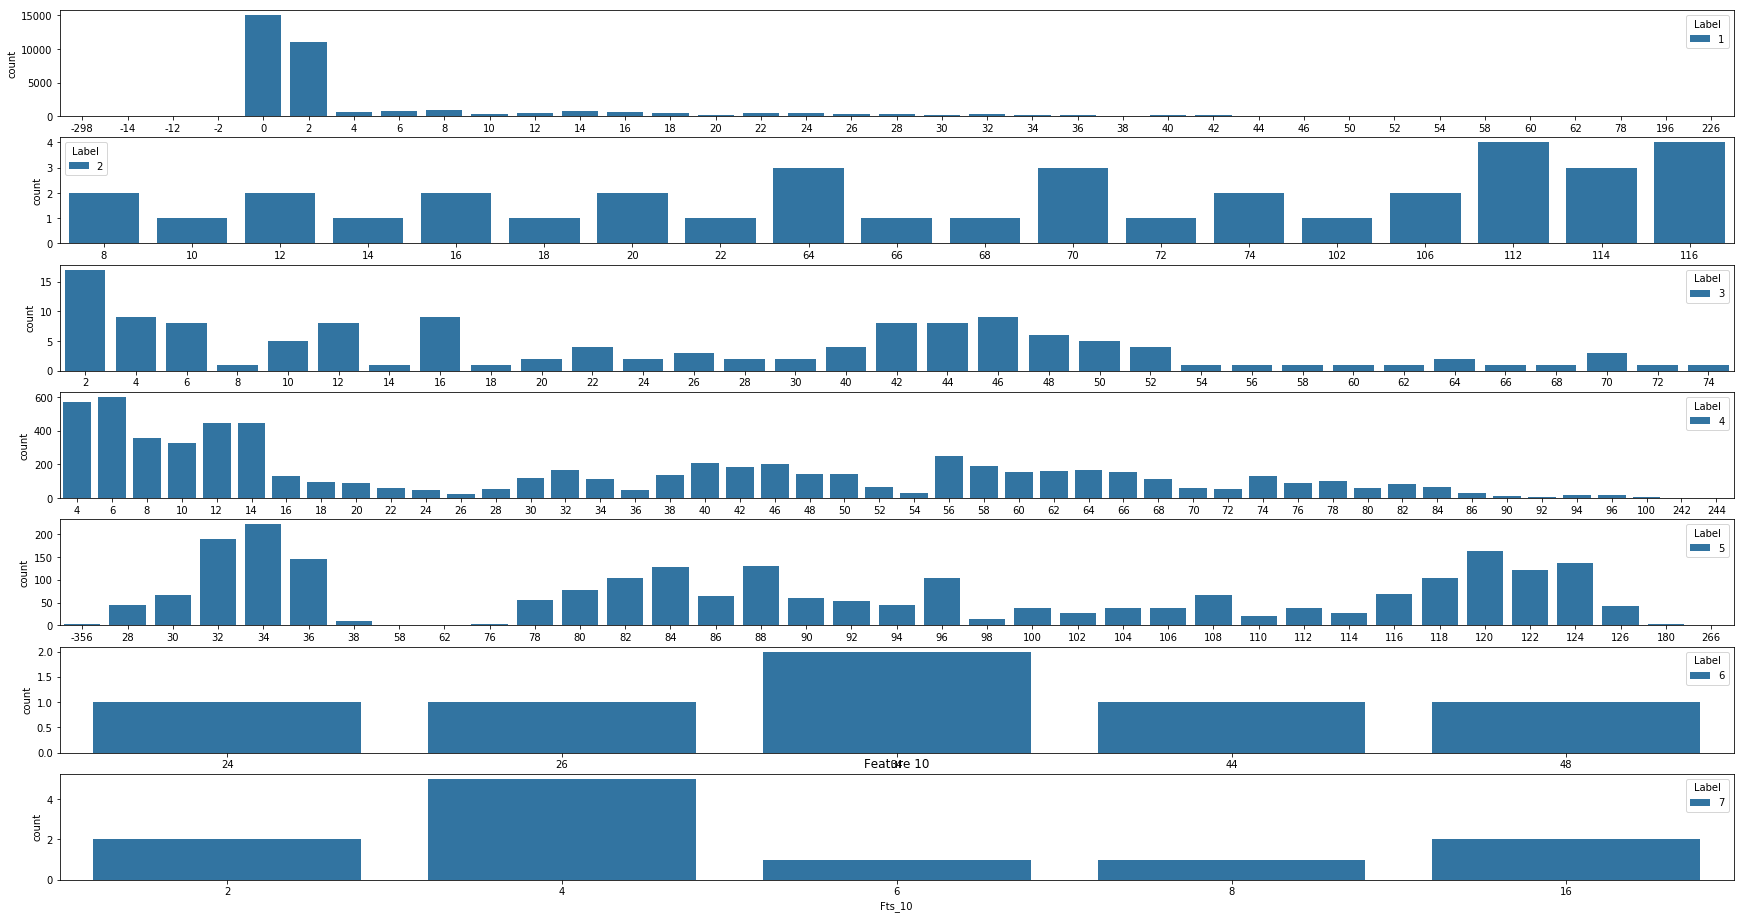

In [19]:
for i in ["0", "1","3","4","5","6","8","9","10"]:

    a4_dims = (30, 16)
    fig, ax = plt.subplots(7, 1, figsize=a4_dims)
    plt.title("Feature {}".format(i))
    sns.countplot(x=df_train[df_train["Label"] == 1]["Fts_" + i], hue=df_train[df_train["Label"] == 1]["Label"], ax=ax[0])
    sns.countplot(x=df_train[df_train["Label"] == 2]["Fts_" + i], hue=df_train[df_train["Label"] == 2]["Label"], ax=ax[1])
    sns.countplot(x=df_train[df_train["Label"] == 3]["Fts_" + i], hue=df_train[df_train["Label"] == 3]["Label"], ax=ax[2])
    sns.countplot(x=df_train[df_train["Label"] == 4]["Fts_" + i], hue=df_train[df_train["Label"] == 4]["Label"], ax=ax[3])
    sns.countplot(x=df_train[df_train["Label"] == 5]["Fts_" + i], hue=df_train[df_train["Label"] == 5]["Label"], ax=ax[4])
    sns.countplot(x=df_train[df_train["Label"] == 6]["Fts_" + i], hue=df_train[df_train["Label"] == 6]["Label"], ax=ax[5])
    sns.countplot(x=df_train[df_train["Label"] == 7]["Fts_" + i], hue=df_train[df_train["Label"] == 7]["Label"], ax=ax[6])

## Label
The distribution of each label is unbalanced, but we know it is not necessary to resample data according to the analysis result of feature 2.

## Distribution of labels

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: Label, dtype: int64

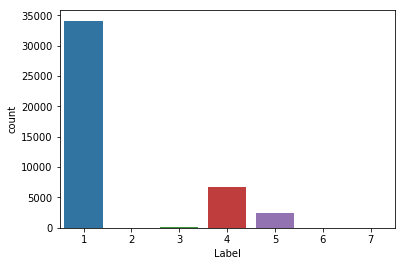

In [20]:
sns.countplot(x ="Label" ,data=df_train)
df_train["Label"].value_counts()

## Correlation coefficient table 
The rule of correlation cofficient 
http://oak.ucc.nau.edu/rh232/courses/EPS525/Handouts/Correlation%20Coefficient%20Handout%20-%20Hinkle%20et%20al.pdf

The correlation cofficient between feature 2 and label is 1, so I choose it as the predictor.

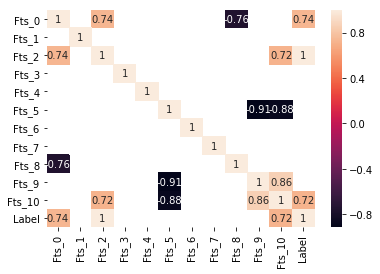

In [21]:
corr = df_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           mask=np.abs(corr) < 0.7,
           annot=True)

# classifier building

## Split up data into randomized training and test sets

In [22]:
features = df_train[['Fts_0', 'Fts_1', 'Fts_2', 'Fts_3', 'Fts_4', 'Fts_5', 'Fts_6', 'Fts_7', 'Fts_8', 'Fts_9', 'Fts_10']]
labels = df_train['Label']

In [23]:
split_test_size = 0.2
m = len(features) 
permutation = list(np.random.permutation(m))
test_number = int(m * split_test_size)
unSuffled_features = np.array(features)

## Shuffling 

In [24]:
Suffled_features = unSuffled_features[permutation]
Suffled_labels = labels[permutation]
X_test, X_train, y_test, y_train = Suffled_features[:test_number], Suffled_features[test_number:]\
                                    , Suffled_labels[:test_number], Suffled_labels[test_number:]

In [25]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(34800, 11) (34800,)
(8700, 11) (8700,)


## classifer

If there is no linear relationship between feature 2 and label, I might choose tree based classfier to segment the feature space

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

In [27]:
class Classifier(BaseEstimator, ClassifierMixin):  
    """A customized classifier"""
    def __init__(self, intValue=0, stringParam="defaultValue"):
        """
        Initializing the classifier
        """
        self.intValue = intValue
        self.stringParam = stringParam

    def fit(self, X, y=None):
        """
        Fitting the classifier
        """
        
        assert (len(X) == len(y))
        self.treshold_ = self.intValue

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "treshold_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        X = np.array(X)
        return (np.round(X[:,2],1) - self.treshold_)

    def score(self, X, y=None):
        # counts number of values bigger than mean
        correct_y = len(np.nonzero(self.predict(X) == y)[0])
        return (correct_y/len(y)) 

In [28]:
MyClf = Classifier(intValue=7.5)

In [29]:
MyClf.fit(X_train, y_train)
y_pred = MyClf.predict(X_test, y_test)
print (MyClf.score(X_test, y_test))

1.0


In [30]:
confusion_matrix(y_pred, y_test)

array([[6805,    0,    0,    0,    0,    0,    0],
       [   0,    9,    0,    0,    0,    0,    0],
       [   0,    0,   31,    0,    0,    0,    0],
       [   0,    0,    0, 1355,    0,    0,    0],
       [   0,    0,    0,    0,  494,    0,    0],
       [   0,    0,    0,    0,    0,    2,    0],
       [   0,    0,    0,    0,    0,    0,    4]], dtype=int64)

In [31]:
def cross_val(clf, X, y, cv):
    
    data_size = len(X)
    cv_scores = []
    
    for i in np.arange(cv)/cv:
        step  = int(1/cv * data_size)
        index = int(data_size*i)
        # train set
        X_train = np.concatenate((X[:index], X[index+step:]))
        y_train = np.concatenate((y[:index], y[index+step:]))
        # valid set
        X_valid = X[index:index+step]
        y_valid = y[index:index+step]
        
        clf.fit(X_train, y_train)
        cv_scores.append(clf.score(X_valid, y_valid))
    return cv_scores

In [32]:
scores = cross_val(MyClf, features, labels, cv=5)
scores

[1.0, 1.0, 1.0, 1.0, 1.0]

In [33]:
cross_val_score(MyClf, features, labels, cv=5)

array([ 1.,  1.,  1.,  1.,  1.])